<a href="https://colab.research.google.com/github/Sgkeoi/GonBaseball/blob/main/%EC%99%B8%EA%B5%AD%EC%9D%B8%EC%84%A0%EC%88%98%EB%B6%84%EC%84%9D_PBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023 프로야구 외국인 선수 분석

- 한국 프로야구는 외국인 선수를 팀 당 3명씩 영입할 수 있다. 투수 2명, 타자 1명을 보유할 수 있으며, 외국인 선수는 보유 3명, 출장은 투수 1명, 타자 1명이 출장 가능합니다.

- 2023년 시즌에는 15명의 외국인 선수들이 신규 등록되었습니다.

- 투수와 타자 파트로 나누어서 선수들의 특징과 플레이 스타일을 분석해보도록 하겠습니다.

- 2022시즌 최종 순위를 기준으로 하여 투수 → 타자 순으로 분석을 진행하겠습니다.

- Baseball Savant에 PBP 데이터가 있는 선수들로 분석을 진행하도록 하겠습니다.

## (프로그래밍) 라이브러리 설치

In [ ]:
# matplotlib 한글 폰트 설치
!sudo apt-get install -y fonts-nanum # 나눔 폰트를 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프 상에서 마이너스 부호가 깨지는 문제를 해결

# numpy, pandas, , seaborn, warnings
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

## SSG 랜더스

- 2022시즌 정규시즌을 한 번도 1위에서 내려오지 않으며 "와이어 투 와이어"우승을 달성하고, 한국시리즈에서도 키움 히어로즈를 상대로 4승 2패로 승리했습니다.

- 2022년에는 윌머 폰트 선수와 재계약, 케빈 크론, 이반 노바 선수와 계약을 맺으며 시즌을 시작했습니다. 시즌 중반 케빈 크론, 이반 노바 선수의 부진으로 후안 라가레스, 숀 모리만도 선수로 교체되었습니다.

- 2023년 시즌을 앞두고 윌머 폰트 선수는 샌디에이고 파드리스와 마이너리그 계약을 체결했으며, 후안 라가레스, 숀 모리만도 선수와도 재계약을 진행하지 않았습니다.

- 결과적으로 2023년 SSG 랜더스의 외국인 선수 3명은 전원 신규 영입입니다. SSG 랜더스는 커크 맥카티, 에니 로메로, 기예르모 에레디야 선수를 영입했습니다.

### 커크 맥카티(Kirk McCarty)

- 생년월일 : 1995.10.12
- 국적 : 미국
- 신체 : 176cm, 83kg
- 포지션 : 투수
- 투타 : 좌투좌타
- 프로입단 : 2017년 드래프트 7라운드(전체 222순위)

#### 2022시즌 성적
> 13G 37.2이닝, 4승 3패, 평균자책점 4.37, 26탈삼진, WHIP 1.33

In [ ]:
kirk = pd.read_csv('/content/drive/MyDrive/baseball_project/player/668948_data.csv')

In [ ]:
kirk['release_extension'] = kirk['release_extension'] * 30.48 # 피트 단위 변경
kirk['release_pos_x'] = kirk['release_pos_x'] * (-30.48)
kirk['release_pos_y'] = kirk['release_pos_y'] * 30.48
kirk['release_pos_z'] = kirk['release_pos_z'] * 30.48
# 주의 : 위 데이터는 포수 시점이다. 투수 시점으로 바꾸려면 x 값들에는 -1을 곱해야 한다.

# 무브먼트
kirk['pfx_x']=kirk['pfx_x']*(-30.48)  # 투수 시점으로 보기 때문에 -1을 곱해야 한다(x축 반전).
kirk['pfx_z']=kirk['pfx_z']*30.48

# 구속
kirk['release_speed'] = kirk['release_speed'] * 1.60934

# 효과구속
# df['effective_speed'] = df['effective_speed'] * 1.60934

# 로케이션의 경우는 스트라이크 존을 봐야 하기 때문에 바꾸지 않는다.
# 피트를 단위변환하지 않는 경우도 있다.

In [ ]:
kirk

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2022-10-03,149.346752,-49.6824,185.6232,"McCarty, Kirk",677951,668948,field_out,hit_into_play,...,2,5,2,5,2,Standard,Standard,153.0,-0.014,-0.099
1,SL,2022-10-03,128.908134,-56.6928,181.3560,"McCarty, Kirk",669004,668948,field_out,hit_into_play,...,2,5,2,5,2,Infield shift,Standard,292.0,0.007,-0.100
2,FC,2022-10-03,141.782854,-56.6928,184.0992,"McCarty, Kirk",669004,668948,NaN,foul,...,2,5,2,5,2,Infield shift,Standard,182.0,0.000,-0.031
3,FC,2022-10-03,142.587524,-58.2168,181.0512,"McCarty, Kirk",669004,668948,NaN,called_strike,...,2,5,2,5,2,Infield shift,Standard,181.0,0.000,-0.024
4,FF,2022-10-03,147.576478,-48.1584,184.4040,"McCarty, Kirk",681987,668948,field_out,hit_into_play,...,2,5,2,5,2,Standard,Standard,153.0,0.008,-0.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,FF,2022-04-24,148.703016,-14.3256,178.9176,"McCarty, Kirk",624431,668948,NaN,swinging_strike,...,0,0,6,6,0,Standard,Standard,155.0,0.000,-0.042
570,CH,2022-04-24,135.345494,-28.3464,172.8216,"McCarty, Kirk",624431,668948,NaN,ball,...,0,0,6,6,0,Standard,Standard,127.0,0.000,0.044
571,FF,2022-04-24,149.346752,-17.9832,178.0032,"McCarty, Kirk",624431,668948,NaN,ball,...,0,0,6,6,0,Standard,Standard,159.0,0.000,0.023
572,FC,2022-04-24,144.357798,-31.6992,174.6504,"McCarty, Kirk",643396,668948,field_out,hit_into_play,...,0,0,6,6,0,Standard,Standard,163.0,-0.001,-0.187


#### 구종별 평균 구속, 최고 구속

In [ ]:
kirk1 = kirk.groupby('pitch_type')['release_speed'].agg(['mean', 'max', 'count'])
kirk1['mean'] = round(kirk1['mean'],1)
kirk1['max'] = round(kirk1['max'],1)
kirk1

,mean,max,count
pitch_type,,,
CH,136.3,140.3,44
CU,124.1,131.5,58
FC,142.5,148.4,231
FF,148.9,152.7,220
SI,146.3,146.3,1
SL,133.1,137.1,20


- 2022시즌에 메이저리그에서 총 574구를 던졌으며 6개의 구질을 던졌습니다.

- FC(커터)가 231구로 제일 많았으며, FF(패스트볼)이 220구로 두 번째로 많았습니다. 커브가 58구, 체인지업이 34구, 슬라이더가 20구였습니다.

- 직구의 평균 구속은 148.9km로 50구 이상 던진 KBO 선수들 사이에서는 윌머 폰트(149.1km), 정철원(148.8km), 이민석(148.8km) 선수와 비슷합니다. 2022년 KBO 리그에서 직구를 50구 이상 던진 선수는 총 213명인데 정철원 선수는 12위, 이민석 선수는 13위입니다.

#### 구종별 회전수 평균

In [ ]:
kirk2 = round(kirk.groupby('pitch_type')['release_spin_rate'].agg(['mean']))
kirk2['mean'] = kirk2['mean'].astype(int)
kirk2

,mean
pitch_type,
CH,1610
CU,2714
FC,2416
FF,2311
SI,2252
SL,2461


- 커크 맥카티 선수의 구종별 회전 수 입니다. 맥카티 선수의 패스트볼 평균 회전 수는 2311(RPM)으로, 2022년 메이저리그 상위 20%에 해당됐습니다. 커브의 분당 회전수도 2714(RPM)으로 2022년 메이저리그 상위 19%에 해당하는 수치입니다.

#### 스트라이크 로케이션

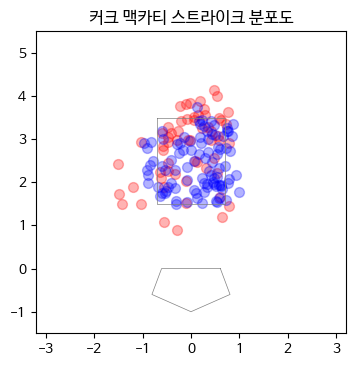

In [ ]:
# 헛스윙
S = kirk.loc[(kirk.description=='swinging_strike') | (kirk.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = kirk.loc[(kirk.description=='called_strike')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('커크 맥카티 스트라이크 분포도')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 패스트볼(FF) 로케이션

- 콜 스트라이크는 빨강색, 스윙 스트라이크는 파랑색, 볼은 초록색, 인플레이 타격은 검정색이다.

- 스윙 스트라이크는 대부분 스트라이크 존 위쪽에 형성되었다.

- 대부분의 패스트볼 로케이션은 높게 형성되어있다.

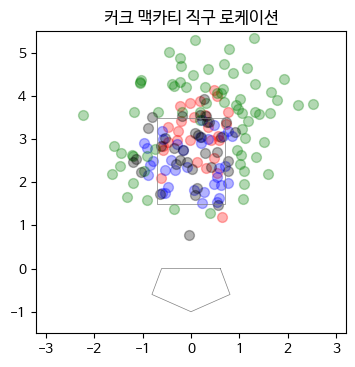

In [ ]:
# 직구
kirkff = kirk[(kirk['pitch_type']=="FF")]

# 헛스윙
S = kirkff.loc[(kirkff.description=='swinging_strike') | (kirkff.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = kirkff.loc[(kirkff.description=='called_strike')]

# 볼
BB = kirkff.loc[(kirkff['description']=='blocked_ball') | (kirkff['description']=='ball')]

# 타격
H = kirkff.loc[(kirkff.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('커크 맥카티 직구 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 컷 패스트볼(FC) 로케이션

- 컷 패스트볼의 경우 스트라이크 존 상하좌우에 로케이션이 형성되어 있다.

- 투수 시점에서 보면 좌타자 몸쪽에 컷 패스트볼을 많이 구사한 것을 알 수 있다.

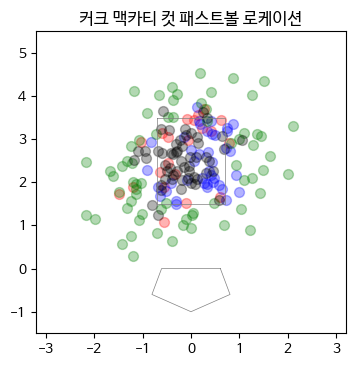

In [ ]:
# 커터
kirkfc = kirk[(kirk['pitch_type']=="FC")]

# 헛스윙
S = kirkfc.loc[(kirkfc.description=='swinging_strike') | (kirkfc.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = kirkfc.loc[(kirkfc.description=='called_strike')]

# 볼
BB = kirkfc.loc[(kirkfc['description']=='blocked_ball') | (kirkfc['description']=='ball')]

# 타격
H = kirkfc.loc[(kirkfc.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('커크 맥카티 컷 패스트볼 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 커브(CU) 로케이션

- 로케이션을 스트라이크 존 아랫쪽으로 던진 것을 볼 수 있습니다. 헛스윙과 스트라이크 콜도 낮게 던진 커브들로 이끌어냈습니다.

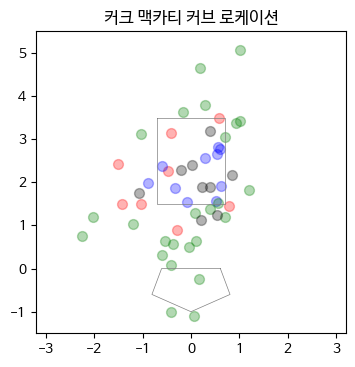

In [ ]:
# 커브
kirkff = kirk[(kirk['pitch_type']=="CU")]

# 헛스윙
S = kirkff.loc[(kirkff.description=='swinging_strike') | (kirkff.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = kirkff.loc[(kirkff.description=='called_strike')]

# 볼
BB = kirkff.loc[(kirkff['description']=='blocked_ball') | (kirkff['description']=='ball')]

# 타격
H = kirkff.loc[(kirkff.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('커크 맥카티 커브 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 체인지업(CH) 로케이션

- 체인지업은 우타자들에게만 사용했습니다. 스트라이크보다 볼의 비율이 높은 것을 볼 수 있습니다.

- 우타자 몸쪽 낮은 코스에 대부분의 체인지업을 구사한 것을 볼 수 있습니다.

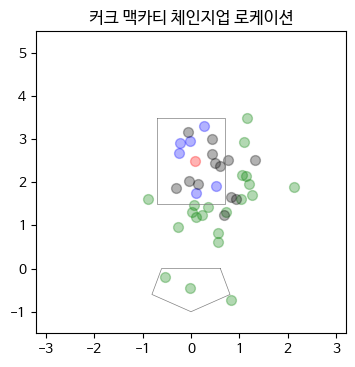

In [ ]:
# 체인지업
kirkch = kirk[(kirk['pitch_type']=="CH")]

# 헛스윙
S = kirkch.loc[(kirkch.description=='swinging_strike') | (kirkch.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = kirkch.loc[(kirkch.description=='called_strike')]

# 볼
BB = kirkch.loc[(kirkch['description']=='blocked_ball') | (kirkch['description']=='ball')]

# 타격
H = kirkch.loc[(kirkch.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('커크 맥카티 체인지업 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 슬라이더(SL) 로케이션

- 슬라이더는 대부분 좌타자 몸쪽으로의 구사율이 높았습니다.

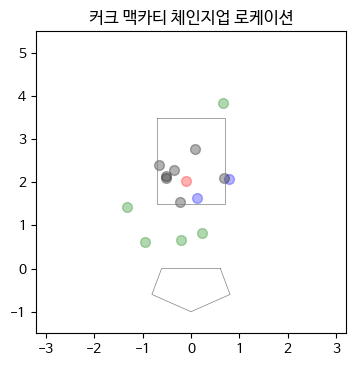

In [ ]:
# 슬라이더
kirksl = kirk[(kirk['pitch_type']=="SL")]

# 헛스윙
S = kirksl.loc[(kirksl.description=='swinging_strike') | (kirkff.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = kirksl.loc[(kirksl.description=='called_strike')]

# 볼
BB = kirksl.loc[(kirksl['description']=='blocked_ball') | (kirksl['description']=='ball')]

# 타격
H = kirksl.loc[(kirksl.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('커크 맥카티 체인지업 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

#### 투구 위치

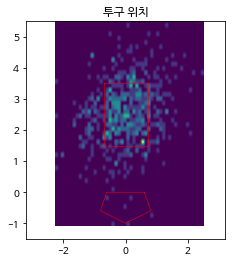

In [ ]:
# Generate some test data
# a,b 값에 투구 자료만 넣으면 된다.
a = kirk.plate_x
b = kirk.plate_z # a,b 변수로 겹치지 않게 한다.

heatmap, xedges, yedges = np.histogram2d(a, b, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')

plt.plot(x, y, c='red', lw=0.5)
plt.plot(x2, y2, c='red', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('투구 위치')

plt.show();

# a,b와 x,y가 겹치면 안 된다.
# a,b 변수로 겹치지 않게 한 다음에 다시 그 이전으로 돌아가서 먼저 실행한 뒤 재실행 하면 된다.

#### 구종별 로케이션

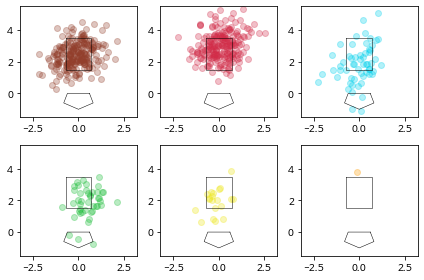

In [ ]:
# 여러 개의 그래프 만들기
# n행 m열의 그래프를 미리 만들지 결정한다.

fig = plt.figure()

axes1 = fig.add_subplot(2,3,1)  # 2행 3열의 1번째
axes2 = fig.add_subplot(2,3,2)
axes3 = fig.add_subplot(2,3,3)
axes4 = fig.add_subplot(2,3,4)
axes5 = fig.add_subplot(2,3,5)
axes6 = fig.add_subplot(2,3,6)

# 커크 맥카티 선수의 구종별 로케이션
FF = kirk[kirk['pitch_type']=="FF"] # 구종이 FF
FC = kirk[kirk['pitch_type']=="FC"]
CU = kirk[kirk['pitch_type']=="CU"]
SI = kirk[kirk['pitch_type']=="SI"]
CH = kirk[kirk['pitch_type']=="CH"]
SL = kirk[kirk['pitch_type']=="SL"]


# 국내에서도 baseball savant의 색깔을 사용하는 경우가 많음
axes1.scatter(FC.plate_x, FC.plate_z, c='#933F2C', alpha=0.3)  # Baseball Savant의 직구 표시 색깔 

# x축, y축 범위 지정
# subplot에서는 set.xlim을 해야 한다.
axes1.set_xlim([L-2.5, R+2.5])
axes1.set_ylim([Bot-3, Top+2])

# 홈플레이트, 스트라이크 존
axes1.plot(x, y, c='black', lw=0.5) # 여러 개의 그래프기 때문에 axes를 해야 한다.
axes1.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes2.scatter(FF.plate_x, FF.plate_z, c='#D22D49', alpha=0.3)
axes2.set_xlim([L-2.5, R+2.5])
axes2.set_ylim([Bot-3, Top+2])

axes2.plot(x, y, c='black', lw=0.5) 
axes2.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes3.scatter(CU.plate_x, CU.plate_z, c='#00D1ED', alpha=0.3)
axes3.set_xlim([L-2.5, R+2.5])
axes3.set_ylim([Bot-3, Top+2])

axes3.plot(x, y, c='black', lw=0.5) 
axes3.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes4.scatter(CH.plate_x, CH.plate_z, c='#1DBE3A', alpha=0.3)
axes4.set_xlim([L-2.5, R+2.5])
axes4.set_ylim([Bot-3, Top+2])

axes4.plot(x, y, c='black', lw=0.5) 
axes4.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes5.scatter(SL.plate_x, SL.plate_z, c='#EEE716', alpha=0.3)
axes5.set_xlim([L-2.5, R+2.5])
axes5.set_ylim([Bot-3, Top+2])

axes5.plot(x, y, c='black', lw=0.5) 
axes5.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes6.scatter(SI.plate_x, SI.plate_z, c='#FE9D00', alpha=0.3) 
axes6.set_xlim([L-2.5, R+2.5])
axes6.set_ylim([Bot-3, Top+2])

axes6.plot(x, y, c='black', lw=0.5) 
axes6.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------

# 틀끼리 겹치지 말게 하기
fig.tight_layout();

#### 구종별 로케이션(등고선)

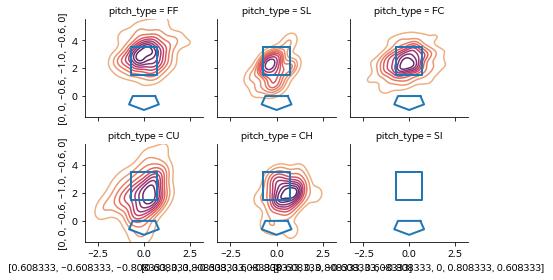

In [ ]:
g = sns.FacetGrid(kirk, col='pitch_type', col_wrap=3, height=2, ylim=(Bot-3, Top+2), xlim=(L-2.5, R+2.5))
g.map(sns.kdeplot, 'plate_x', 'plate_z', cmap='flare')
g.map_dataframe(plt.plot, x2, y2, '-', linewidth=2) # 스트라이크 존 추가
g.map_dataframe(plt.plot, x, y, '-', linewidth=2);  # 홈 플레이트 추가

# 옵션
# col_wrap = : 최대 열 갯수
# height = : 최대 행 갯수
# xlim, ylim : 범위 제한
# cmap : 색상 팔레트

#### 좌,우 로케이션

- 슬라이더는 대부분의 공을 우타자에게 사용했으며, 체인지업은 우타자에게만 사용했습니다.

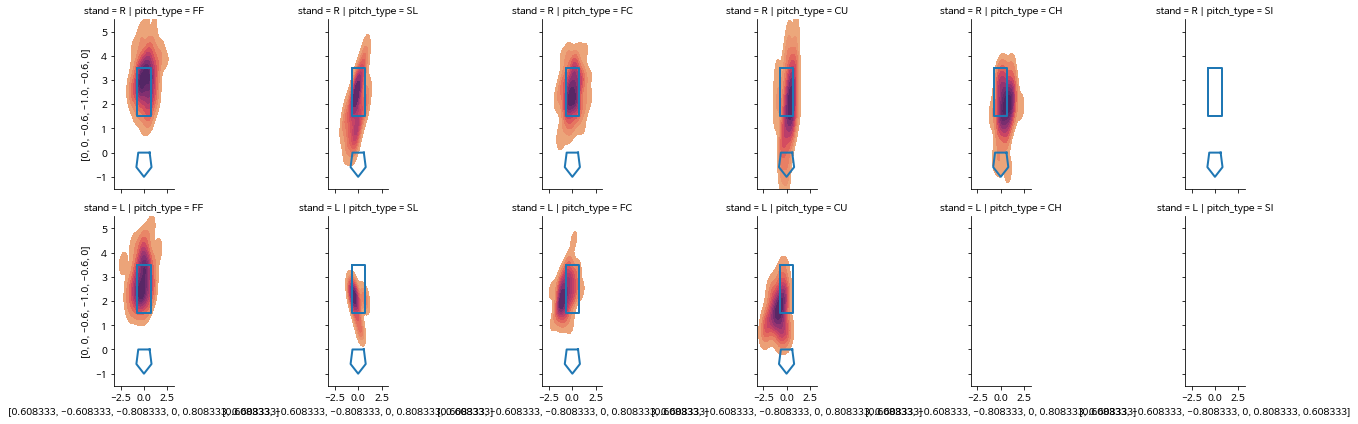

In [ ]:
# 좌,우 타자 로케이션도 똑같은지 확인해보기
g = sns.FacetGrid(kirk, col='pitch_type', row='stand', ylim=(Bot-3, Top+2), xlim=(L-2.5, R+2.5))
g.map(sns.kdeplot, 'plate_x', 'plate_z', cmap='flare', shade=True)
g.map_dataframe(plt.plot, x2, y2, '-', linewidth=2) # 스트라이크 존 추가
g.map_dataframe(plt.plot, x, y, '-', linewidth=2)  # 홈 플레이트 추가

fig.tight_layout();
# 옵션
# col_wrap = : 최대 열 갯수
# height = : 최대 행 갯수
# xlim, ylim : 범위 제한
# cmap : 색상 팔레트

#### 구종별 익스텐션

- 슬라이더의 익스텐션이 편차가 있는 편이다.

- 좌투수에게 슬라이더를 구사할 때는 익스텐션이 낮아집니다. 반면 우투수에게 슬라이더를 던질 때는 익스텐션이 높아지는 것을 볼 수 있습니다.

In [ ]:
round(kirk.groupby('pitch_type')['release_extension'].agg(['mean']),1)

,mean
pitch_type,
CH,182.7
CU,180.1
FC,186.0
FF,185.4
SI,182.9
SL,185.5


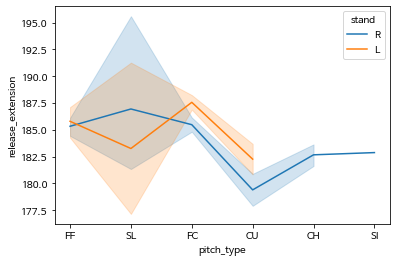

In [ ]:
sns.lineplot(x='pitch_type', y='release_extension', hue='stand', data=kirk);

#### 2스트라이크 이후 투구

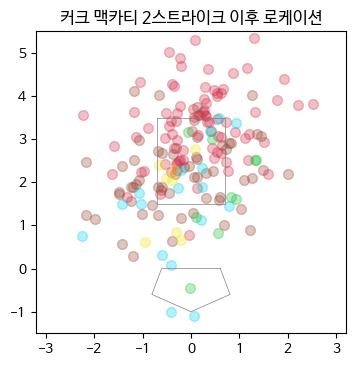

In [ ]:
kirk2 = kirk[kirk.strikes>=2]

# 커터
kirk2fc = kirk2[(kirk2['pitch_type']=="FC")]

# 패스트볼
kirk2ff = kirk2[(kirk2['pitch_type']=="FF")]

# 커브
kirk2cu = kirk2[(kirk2['pitch_type']=="CU")]

# 체인지업
kirk2ch = kirk2[(kirk2['pitch_type']=="CH")]

# 슬라이더
kirk2sl = kirk2[(kirk2['pitch_type']=="SL")]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('커크 맥카티 2스트라이크 이후 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(kirk2fc['plate_x'], kirk2fc['plate_z'], s=50, color='#933F2C', alpha=alpha_) 
plt.scatter(kirk2ff['plate_x'], kirk2ff['plate_z'], s=50, color='#D22D49', alpha=alpha_) 
plt.scatter(kirk2cu['plate_x'], kirk2cu['plate_z'], s=50, color='#00D1ED', alpha=alpha_)  
plt.scatter(kirk2ch['plate_x'], kirk2ch['plate_z'], s=50, color='#1DBE3A', alpha=alpha_)
plt.scatter(kirk2sl['plate_x'], kirk2sl['plate_z'], s=50, color='#EEE716', alpha=alpha_)
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

#### 무브먼트

,pfx_x,pfx_z
pitch_type,,
CH,-31.678418,33.167782
CU,23.128014,-21.152069
FC,7.234712,22.619855
FF,-18.045545,46.973836
SI,-35.661600,59.131200
SL,15.270480,5.273040


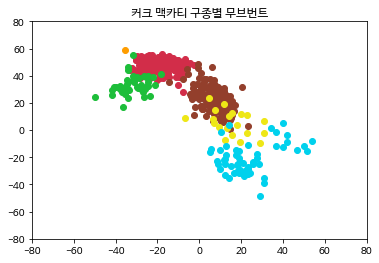

In [ ]:
FF=kirk.loc[kirk.pitch_type == 'FF']  #직구
FC=kirk.loc[kirk.pitch_type == 'FC']  #커터
SI=kirk.loc[kirk.pitch_type == 'SI']  #싱커(투심)
CH=kirk.loc[kirk.pitch_type == 'CH']  #체인지업
SL=kirk.loc[kirk.pitch_type == 'SL']  #슬라이더
CU=kirk.loc[kirk.pitch_type == 'CU']  #커브

plt.scatter(FF['pfx_x'],FF['pfx_z'], c='#D22D49')
plt.scatter(FC['pfx_x'],FC['pfx_z'], c='#933F2C')
plt.scatter(SI['pfx_x'],SI['pfx_z'], c='#FE9D00')
plt.scatter(CH['pfx_x'],CH['pfx_z'], c='#1DBE3A')
plt.scatter(SL['pfx_x'],SL['pfx_z'], c='#EEE716')
plt.scatter(CU['pfx_x'],CU['pfx_z'], c='#00D1ED')

plt.xlim([-80, 80])
plt.ylim([-80, 80])
plt.title('커크 맥카티 구종별 무브번트')

kirk.groupby('pitch_type')['pfx_x','pfx_z'].mean()

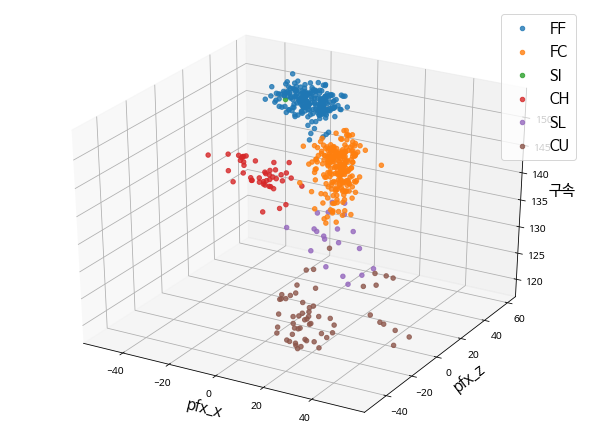

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig) 
# ax.view_init(50,80)
for i_ in ['FF', 'FC', 'SI', 'CH', 'SL', 'CU']:
  tt = kirk[kirk["pitch_type"]==i_] # 순서대로 내려가면서 투구 데이터 하나가 구종과 맞으면 하나씩 저장
  ax.scatter(tt["pfx_x"], tt['pfx_z'], tt['release_speed'], alpha=.8,label=i_,) # 맞는 데이터는 산점도 생성
ax.legend(fontsize=15)

ax.set_xlabel('pfx_x', fontsize=15)
ax.set_ylabel('pfx_z', fontsize=15)
ax.set_zlabel('구속', fontsize=15)

plt.show() 

- 투구 분포를 시속 km/h 단위의 구속 s, 인치 단위의 횡방향 및 종방향 움직임(x, z)과 구종에 따라 다른 색으로 나타낸 것이다.

## kt 위즈

- 2021년 정규시즌, 한국시리즈 우승팀인 Kt 위즈는 2022시즌에 정규시즌을 4위로 마감했습니다. 와일드카드 결정전에서 만난 기아 타이거즈에게 승리한 후, 준플레이오프에서 키움 히어로즈에 5차전까지 가는 접전 끝에 2:3으로 플레이오프 진출이 좌절되었습니다.

- 오도리사머 데스파이네, 윌리엄 쿠에바스, 헨리 라모스와 계약하며 시즌을 시작했지만 쿠에바스 선수와 라모스 선수가 부상으로 중도 퇴출되었습니다.

- 대체 용병으로 영입한 웨스 벤자민 선수와 앤서니 알포드 선수가 활약하면서 2023년에도 재계약을 진행했습니다.

- 데스파이네 선수와는 재계약을 하지 않고 보 슐서 선수를 영입하며 용병 구성을 마쳤습니다.

### 보 슐서(Beau Grayson Sulser)

- 생년월일 : 1994.5.5
- 국적 : 미국
- 신체 : 188cm, 88kg
- 포지션 : 투수
- 투타 : 우투우타
- 프로입단 : 2017년 드래프트 10라운드(전체 298순위)

#### 2022시즌 성적
> 10G 22.1이닝, 0승 0패, 평균자책점 3.63, 19탈삼진, WHIP 1.48

#### 구종별 평균 구속, 최고 구속

In [ ]:
beau = pd.read_csv('/content/drive/MyDrive/baseball_project/player/676641_data.csv')

In [ ]:
beau['release_extension'] = beau['release_extension'] * 30.48 # 피트 단위 변경
beau['release_pos_x'] = beau['release_pos_x'] * (-30.48)
beau['release_pos_y'] = beau['release_pos_y'] * 30.48
beau['release_pos_z'] = beau['release_pos_z'] * 30.48
# 주의 : 위 데이터는 포수 시점이다. 투수 시점으로 바꾸려면 x 값들에는 -1을 곱해야 한다.

# 무브먼트
beau['pfx_x']=beau['pfx_x']*(-30.48)  # 투수 시점으로 보기 때문에 -1을 곱해야 한다(x축 반전).
beau['pfx_z']=beau['pfx_z']*30.48

# 구속
beau['release_speed'] = beau['release_speed'] * 1.60934

# 효과구속
# df['effective_speed'] = df['effective_speed'] * 1.60934

# 로케이션의 경우는 스트라이크 존을 봐야 하기 때문에 바꾸지 않는다.
# 피트를 단위변환하지 않는 경우도 있다.

In [ ]:
beau

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FC,2022-10-05,141.300052,60.3504,188.9760,"Sulser, Beau",593160,676641,grounded_into_double_play,hit_into_play,...,1,5,1,5,1,Standard,Standard,203,0.003,-0.371
1,FC,2022-10-05,139.368844,62.4840,188.3664,"Sulser, Beau",606192,676641,field_out,hit_into_play,...,1,5,1,5,1,Standard,Standard,202,0.002,-0.480
2,KC,2022-10-05,128.586266,61.5696,185.3184,"Sulser, Beau",606192,676641,NaN,blocked_ball,...,1,5,1,5,1,Standard,Standard,33,0.000,0.146
3,FC,2022-10-05,139.529778,61.2648,185.9280,"Sulser, Beau",606192,676641,NaN,swinging_strike,...,1,5,1,5,1,Standard,Standard,200,0.000,-0.099
4,FF,2022-10-05,149.668620,51.2064,192.3288,"Sulser, Beau",606192,676641,NaN,ball,...,1,5,1,5,1,Standard,Standard,223,0.000,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,CH,2022-04-26,134.379890,53.0352,182.8800,"Sulser, Beau",642133,676641,NaN,ball,...,4,10,4,10,4,Infield shift,Strategic,236,0.000,0.023
356,CH,2022-04-26,135.506428,56.0832,179.2224,"Sulser, Beau",457705,676641,strikeout,swinging_strike,...,4,10,4,10,4,Standard,Standard,230,0.001,-0.158
357,FF,2022-04-26,149.668620,47.2440,183.7944,"Sulser, Beau",457705,676641,NaN,foul,...,4,10,4,10,4,Standard,Standard,222,0.000,-0.054
358,FC,2022-04-26,139.046976,56.0832,180.1368,"Sulser, Beau",457705,676641,NaN,called_strike,...,4,10,4,10,4,Standard,Standard,221,0.000,-0.043


In [ ]:
beau1 = beau.groupby('pitch_type')['release_speed'].agg(['mean', 'max', 'count'])
beau1['mean'] = round(beau1['mean'],1)
beau1['max'] = round(beau1['max'],1)
beau1

,mean,max,count
pitch_type,,,
CH,134.6,139.4,114
FC,141.8,146.6,82
FF,149.4,153.2,134
KC,129.3,132.3,30


- 보 슐서 선수는 2022년 메이저리그에서 총 360구를 던졌으며, 구사한 구종은 총 4개입니다.

- 속구(FF)와 체인지업(CH)의 비율이 전체 투구의 약 69%에 해당됩니다.

- 속구의 평균 구속은 149.4km/h, 최고 구속은 153.2km/h입니다. 2022년 속구를 50개 이상 던진 투수 213명 중 10~11위(상위 5%)에 해당하는 구속입니다. 비슷한 직구 구속을 가진 선수는 윌머 폰트(149.1km/h), 로니 윌리엄스(149.1km/h)가 있습니다.

- 체인지업의 평균 구속은 134.6km입니다. 2022년 체인지업을 50개 이상 던진 투수 77명 중 4위(상위 5%)에 해당하는 구속입니다. 비슷한 체인지업 구속을 가진 선수는 펠릭스 페냐(134.6km/h), 알버트 수아레즈, 숀 모리만도, 이의리(이상 134.4km/h)가 있습니다.

- 3번째로 많이 던진 구종은 컷 패스트볼(FC), 너클커브(KC)입니다.

#### 구종별 회전수 평균

In [ ]:
beau2 = round(beau.groupby('pitch_type')['release_spin_rate'].agg(['mean']))
beau2['mean'] = beau2['mean'].astype(int)
beau2

,mean
pitch_type,
CH,1469
FC,2342
FF,2344
KC,2495


- 보 슐서 선수의 직구 회전수는 2022년 메이저리그 투수 중 상위 24%에 해당되는 수치입니다.

#### 스트라이크 로케이션

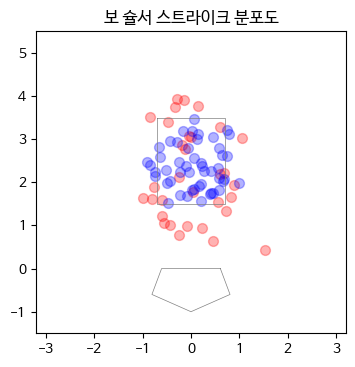

In [ ]:
# 헛스윙
S = beau.loc[(beau.description=='swinging_strike') | (beau.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = beau.loc[(beau.description=='called_strike')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('보 슐서 스트라이크 분포도')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

- 스윙 스트라이크를 낮게 제구한 공으로 잡은 것을 알 수 있습니다.

##### 패스트볼(FF) 로케이션

- 콜 스트라이크를 받은 직구의 로케이션은 대부분 스트라이크 존 아래쪽에 형성되어 있습니다.

- 하이 패스트볼로 헛스윙을 이끌어내지는 않는 투구를 보이고 있습니다.

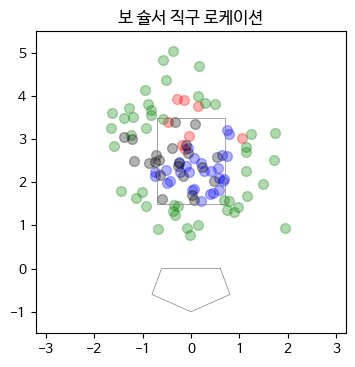

In [ ]:
# 직구
beauff = beau[(beau['pitch_type']=="FF")]

# 헛스윙
S = beauff.loc[(beauff.description=='swinging_strike') | (beauff.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = beauff.loc[(beauff.description=='called_strike')]

# 볼
BB = beauff.loc[(beauff['description']=='blocked_ball') | (beauff['description']=='ball')]

# 타격
H = beauff.loc[(beauff.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('보 슐서 직구 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 컷 패스트볼(FC) 로케이션

- 컷 패스트볼의 경우 우타자 몸쪽, 좌타자 바깥쪽에 많이 형성되어 있습니다.

- 우타자의 기준에서는 몸쪽 낮은 공, 좌타자의 기준에서는 바깥쪽 낮은 공에 로케이션을 대부분 형성하고 있습니다.

- 스트라이크 존 위쪽에 형성된 커터들은 스트라이크 콜을 많이 받은 반면, 스트라이크 존 아래쪽에 형성된 커터들은 대부분 인플레이 타구로 연결되고 있습니다.

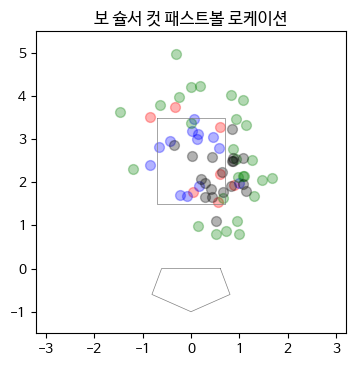

In [ ]:
# 커터
beaufc = beau[(beau['pitch_type']=="FC")]

# 헛스윙
S = beaufc.loc[(beaufc.description=='swinging_strike') | (beaufc.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = beaufc.loc[(beaufc.description=='called_strike')]

# 볼
BB = beaufc.loc[(beaufc['description']=='blocked_ball') | (beaufc['description']=='ball')]

# 타격
H = beaufc.loc[(beaufc.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('보 슐서 컷 패스트볼 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 체인지업(CH) 로케이션

- 낮게 제구되는 체인지업으로 헛스윙을 유도하고 있습니다.

- 체인지업이 조금이라도 위로(스트라이크 존 안) 몰리게 되면 인플레이 타구로 연결되고 있습니다.

- 좌타자 기준에서는 바깥쪽 위, 우타자 기준에서는 몸쪽 위로는 로케이션이 형성이 되지 않았습니다.

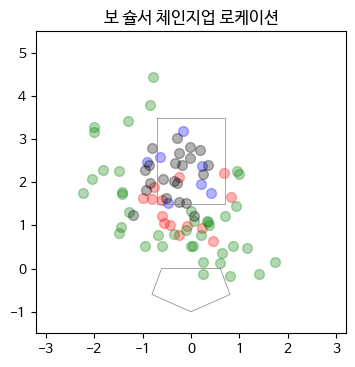

In [ ]:
# 체인지업
beauch = beau[(beau['pitch_type']=="CH")]

# 헛스윙
S = beauch.loc[(beauch.description=='swinging_strike') | (beauch.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = beauch.loc[(beauch.description=='called_strike')]

# 볼
BB = beauch.loc[(beauch['description']=='blocked_ball') | (beauch['description']=='ball')]

# 타격
H = beauch.loc[(beauch.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('보 슐서 체인지업 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 너클커브(KC) 로케이션

- 너클커브는 좌타자들에게 주로 사용했다는 것을 알 수 있습니다.

- 좌타자 기준으로 바깥쪽 낮은 곳에 로케이션이 대부분 형성되어 있습니다.

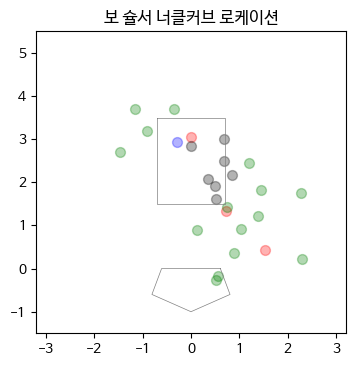

In [ ]:
# 너클커브
beaukc = beau[(beau['pitch_type']=="KC")]

# 헛스윙
S = beaukc.loc[(beaukc.description=='swinging_strike') | (beaukc.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = beaukc.loc[(beaukc.description=='called_strike')]

# 볼
BB = beaukc.loc[(beaukc['description']=='blocked_ball') | (beaukc['description']=='ball')]

# 타격
H = beaukc.loc[(beaukc.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('보 슐서 너클커브 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

#### 투구 위치

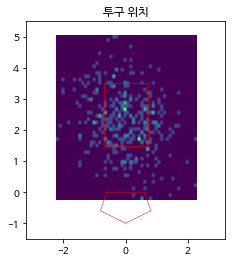

In [ ]:
# Generate some test data
# a,b 값에 투구 자료만 넣으면 된다.
a = beau.plate_x
b = beau.plate_z # a,b 변수로 겹치지 않게 한다.

heatmap, xedges, yedges = np.histogram2d(a, b, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')

plt.plot(x, y, c='red', lw=0.5)
plt.plot(x2, y2, c='red', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('투구 위치')

plt.show();

# a,b와 x,y가 겹치면 안 된다.
# a,b 변수로 겹치지 않게 한 다음에 다시 그 이전으로 돌아가서 먼저 실행한 뒤 재실행 하면 된다.

#### 구종별 로케이션

- 분홍색은 직구, 갈색은 커터, 주황색은 체인지업, 보라색은 너클커브입니다.

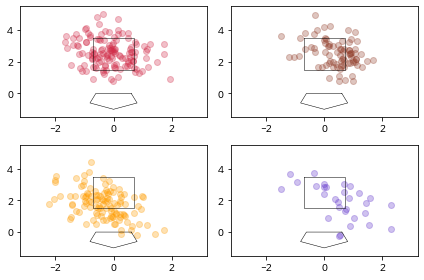

In [ ]:
# 여러 개의 그래프 만들기
# n행 m열의 그래프를 미리 만들지 결정한다.

fig = plt.figure()

axes1 = fig.add_subplot(2,2,1)  # 2행 2열의 1번째
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

# 보 슐서 선수의 구종별 로케이션
FF = beau[beau['pitch_type']=="FF"] # 구종이 FF
FC = beau[beau['pitch_type']=="FC"]
CH = beau[beau['pitch_type']=="CH"]
KC = beau[beau['pitch_type']=="KC"]


# 국내에서도 baseball savant의 색깔을 사용하는 경우가 많음
axes1.scatter(FF.plate_x, FF.plate_z, c='#D22D49', alpha=0.3)  # Baseball Savant의 직구 표시 색깔

# x축, y축 범위 지정
# subplot에서는 set.xlim을 해야 한다.
axes1.set_xlim([L-2.5, R+2.5])
axes1.set_ylim([Bot-3, Top+2])

# 홈플레이트, 스트라이크 존
axes1.plot(x, y, c='black', lw=0.5) # 여러 개의 그래프기 때문에 axes를 해야 한다.
axes1.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes2.scatter(FC.plate_x, FC.plate_z, c='#933F2C', alpha=0.3)
axes2.set_xlim([L-2.5, R+2.5])
axes2.set_ylim([Bot-3, Top+2])

axes2.plot(x, y, c='black', lw=0.5) 
axes2.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes3.scatter(CH.plate_x, CH.plate_z, c='#FE9D00', alpha=0.3)
axes3.set_xlim([L-2.5, R+2.5])
axes3.set_ylim([Bot-3, Top+2])

axes3.plot(x, y, c='black', lw=0.5) 
axes3.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes4.scatter(KC.plate_x, KC.plate_z, c='#6236CD', alpha=0.3)
axes4.set_xlim([L-2.5, R+2.5])
axes4.set_ylim([Bot-3, Top+2])

axes4.plot(x, y, c='black', lw=0.5) 
axes4.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------

# 틀끼리 겹치지 말게 하기
fig.tight_layout();

#### 구종별 로케이션(등고선)

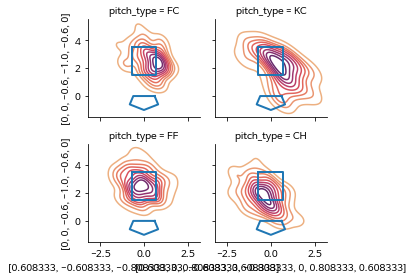

In [ ]:
g = sns.FacetGrid(beau, col='pitch_type', col_wrap=2, height=2, ylim=(Bot-3, Top+2), xlim=(L-2.5, R+2.5))
g.map(sns.kdeplot, 'plate_x', 'plate_z', cmap='flare')
g.map_dataframe(plt.plot, x2, y2, '-', linewidth=2) # 스트라이크 존 추가
g.map_dataframe(plt.plot, x, y, '-', linewidth=2);  # 홈 플레이트 추가

# 옵션
# col_wrap = : 최대 열 갯수
# height = : 최대 행 갯수
# xlim, ylim : 범위 제한
# cmap : 색상 팔레트

#### 좌,우 로케이션

- 컷 패스트볼의 경우에는 우타자들에게는 몸쪽 낮은 공으로, 좌타자들에게는 바깥쪽 높은 공으로 구사했음을 알 수 있습니다.

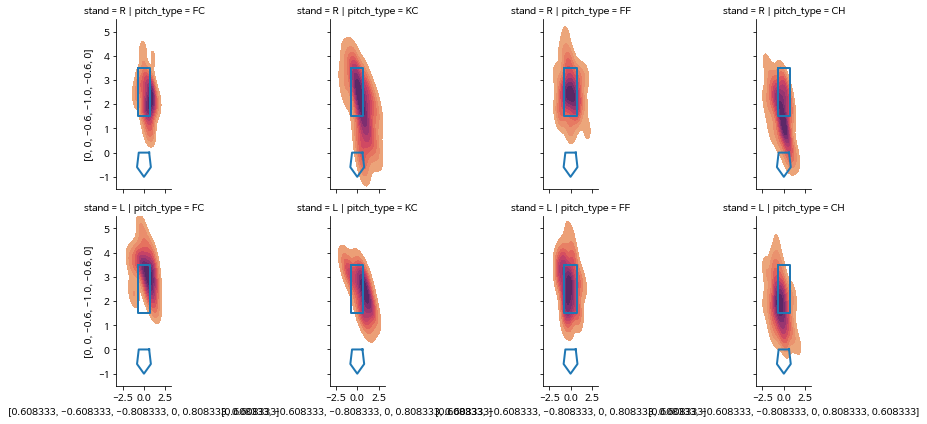

In [ ]:
# 좌,우 타자 로케이션도 똑같은지 확인해보기
g = sns.FacetGrid(beau, col='pitch_type', row='stand', ylim=(Bot-3, Top+2), xlim=(L-2.5, R+2.5))
g.map(sns.kdeplot, 'plate_x', 'plate_z', cmap='flare', shade=True)
g.map_dataframe(plt.plot, x2, y2, '-', linewidth=2) # 스트라이크 존 추가
g.map_dataframe(plt.plot, x, y, '-', linewidth=2)  # 홈 플레이트 추가

fig.tight_layout();
# 옵션
# col_wrap = : 최대 열 갯수
# height = : 최대 행 갯수
# xlim, ylim : 범위 제한
# cmap : 색상 팔레트

#### 구종별 익스텐션

- 슬라이더의 익스텐션이 편차가 있는 편이다.

- 전체적으로 우투수와 좌투수를 상대할 때 익스텐션의 차이가 있습니다.

In [ ]:
round(beau.groupby('pitch_type')['release_extension'].agg(['mean']),1)

,mean
pitch_type,
CH,196.3
FC,195.2
FF,195.5
KC,194.8


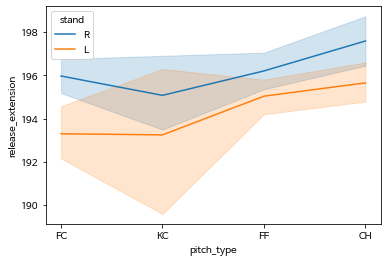

In [ ]:
sns.lineplot(x='pitch_type', y='release_extension', hue='stand', data=beau);

#### 2스트라이크 이후 투구

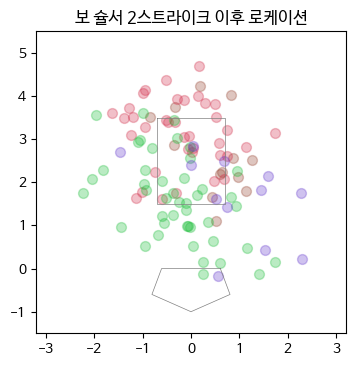

In [ ]:
beau2 = beau[beau.strikes>=2]

# 커터
beau2fc = beau2[(beau2['pitch_type']=="FC")]

# 패스트볼
beau2ff = beau2[(beau2['pitch_type']=="FF")]

# 체인지업
beau2ch = beau2[(beau2['pitch_type']=="CH")]

# 너클커브
beau2kc = beau2[(beau2['pitch_type']=="KC")]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('보 슐서 2스트라이크 이후 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(beau2fc['plate_x'], beau2fc['plate_z'], s=50, color='#933F2C', alpha=alpha_) 
plt.scatter(beau2ff['plate_x'], beau2ff['plate_z'], s=50, color='#D22D49', alpha=alpha_)   
plt.scatter(beau2ch['plate_x'], beau2ch['plate_z'], s=50, color='#1DBE3A', alpha=alpha_)
plt.scatter(beau2kc['plate_x'], beau2kc['plate_z'], s=50, color='#6236CD', alpha=alpha_)
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

#### 무브먼트

,pfx_x,pfx_z
pitch_type,,
CH,36.145537,17.456484
FC,-1.784195,22.581220
FF,32.340645,41.575630
KC,-32.705040,-13.817600


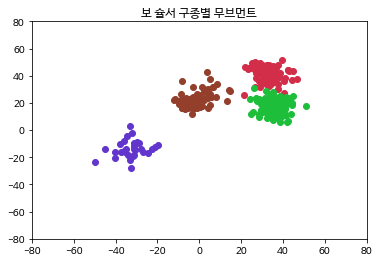

In [ ]:
FF=beau.loc[beau.pitch_type == 'FF']  #직구
FC=beau.loc[beau.pitch_type == 'FC']  #커터
CH=beau.loc[beau.pitch_type == 'CH']  #체인지업
KC=beau.loc[beau.pitch_type == 'KC']  #너클커브

plt.scatter(FF['pfx_x'],FF['pfx_z'], c='#D22D49')
plt.scatter(FC['pfx_x'],FC['pfx_z'], c='#933F2C')
plt.scatter(CH['pfx_x'],CH['pfx_z'], c='#1DBE3A')
plt.scatter(KC['pfx_x'],KC['pfx_z'], c='#6236CD')

plt.xlim([-80, 80])
plt.ylim([-80, 80])
plt.title('보 슐서 구종별 무브먼트')

beau.groupby('pitch_type')['pfx_x','pfx_z'].mean()

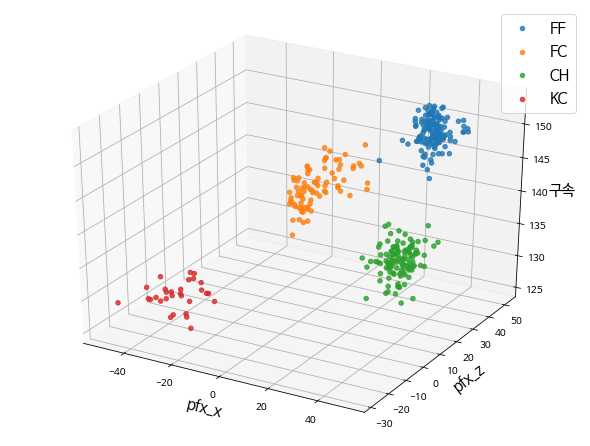

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig) 
# ax.view_init(50,80)
for i_ in ['FF', 'FC', 'CH', 'KC']:
  tt = beau[beau["pitch_type"]==i_] # 순서대로 내려가면서 투구 데이터 하나가 구종과 맞으면 하나씩 저장
  ax.scatter(tt["pfx_x"], tt['pfx_z'], tt['release_speed'], alpha=.8,label=i_,) # 맞는 데이터는 산점도 생성
ax.legend(fontsize=15)

ax.set_xlabel('pfx_x', fontsize=15)
ax.set_ylabel('pfx_z', fontsize=15)
ax.set_zlabel('구속', fontsize=15)

plt.show() 

## KIA 타이거즈

- 2022시즌 정규시즌 5위로 4년 만에 가을야구에 진출한 기아 타이거즈는 와일드카드 결정전에서 kt 위즈에게 패배하며 시즌을 마감했습니다.

- 션 놀린, 로니 윌리엄스, 소크라테스 브리토 선수를 영입하면서 2022년 시즌을 시작했습니다.

- 로니 윌리엄스 선수가 성적 부진으로 중도 방출되면서 대체 선수로 토마스 파노니 선수를 영입했습니다.

- 타격에서 좋은 성적을 보여준 소크라테스 브리토(.311/.354/.494, 17홈런, wRC+ 137)를 제외하고는 션 놀린, 토마스 파노니 선수와 재계약을 하지 않고 아도니스 메디나 선수와 숀 앤더슨 선수를 영입했습니다.

### 아도니스 메디나(Adonis Medina)

- 생년월일 : 1996.12.18
- 국적 : 도미니카 공화국
- 신체 : 185cm, 84kg
- 포지션 : 투수
- 투타 : 우투우타
- 프로입단 : 2014년 국제 아마추어 자유계약(필라델피아 필리스)

#### 2022시즌 성적
> 14G 23.2이닝, 1승 0패, 평균자책점 6.08, 17탈삼진, WHIP 1.52

#### 구종별 평균 구속, 최고 구속

In [ ]:
ado = pd.read_csv('/content/drive/MyDrive/baseball_project/player/658431_data.csv')

In [ ]:
ado['release_extension'] = ado['release_extension'] * 30.48 # 피트 단위 변경
ado['release_pos_x'] = ado['release_pos_x'] * (-30.48)
ado['release_pos_y'] = ado['release_pos_y'] * 30.48
ado['release_pos_z'] = ado['release_pos_z'] * 30.48
# 주의 : 위 데이터는 포수 시점이다. 투수 시점으로 바꾸려면 x 값들에는 -1을 곱해야 한다.

# 무브먼트
ado['pfx_x']=ado['pfx_x']*(-30.48)  # 투수 시점으로 보기 때문에 -1을 곱해야 한다(x축 반전).
ado['pfx_z']=ado['pfx_z']*30.48

# 구속
ado['release_speed'] = ado['release_speed'] * 1.60934

# 효과구속
# df['effective_speed'] = df['effective_speed'] * 1.60934

# 로케이션의 경우는 스트라이크 존을 봐야 하기 때문에 바꾸지 않는다.
# 피트를 단위변환하지 않는 경우도 있다.

In [ ]:
ado

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CH,2022-09-03,140.334448,92.6592,164.8968,"Medina, Adonis",657041,658431,single,hit_into_play,...,1,7,1,7,1,Standard,Standard,253,-0.003,0.719
1,SI,2022-09-03,151.117026,83.5152,164.2872,"Medina, Adonis",657041,658431,NaN,ball,...,1,6,1,6,1,Standard,Standard,230,0.000,0.030
2,SL,2022-09-03,137.115768,90.8304,165.5064,"Medina, Adonis",657041,658431,NaN,foul,...,1,6,1,6,1,Standard,Standard,100,0.000,0.000
3,SL,2022-09-03,139.851646,90.2208,167.9448,"Medina, Adonis",657041,658431,NaN,called_strike,...,1,6,1,6,1,Standard,Standard,129,0.000,-0.082
4,SI,2022-09-03,150.634224,85.3440,166.4208,"Medina, Adonis",657041,658431,NaN,called_strike,...,1,5,1,5,1,Standard,Standard,230,0.000,-0.078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,CH,2022-04-23,142.265656,71.0184,178.0032,"Medina, Adonis",672695,658431,NaN,foul,...,2,2,5,5,2,Infield shift,Standard,240,0.000,0.000
410,CU,2022-04-23,131.804946,66.1416,177.3936,"Medina, Adonis",672695,658431,NaN,ball,...,2,2,5,5,2,Infield shift,Standard,55,0.000,0.017
411,SL,2022-04-23,144.035930,69.1896,180.4416,"Medina, Adonis",672695,658431,NaN,foul,...,2,2,5,5,2,Infield shift,Standard,137,0.000,0.000
412,CH,2022-04-23,140.173514,71.6280,180.7464,"Medina, Adonis",672695,658431,NaN,foul,...,2,2,5,5,2,Infield shift,Standard,241,0.000,-0.046


In [ ]:
ado1 = ado.groupby('pitch_type')['release_speed'].agg(['mean', 'max', 'count'])
ado1['mean'] = round(ado1['mean'],1)
ado1['max'] = round(ado1['max'],1)
ado1

,mean,max,count
pitch_type,,,
CH,140.2,144.5,69
CU,129.4,134.2,31
FF,149.8,153.2,73
SI,150.4,153.7,125
SL,139.0,145.5,116


- 아도니스 메디나 선수는 2022년 메이저리그에서 총 414구를 던졌으며, 5개의 구종을 구사했습니다.

- 싱킹 패스트볼(SI)을 가장 많이 던졌습니다. 평균 150.4km/h이며 싱킹 패스트볼 평균 구속은 2022년 메이저리그에서는 상위 53%에 해당하는 수치입니다.

- 두 번째로 많이 던진 구종은 슬라이더(SL)입니다. 평균 139km/h, 최고 145.5km/h까지 던질 수 있습니다. 2022년 KBO 리그에서 슬라이더를 50구 이상 던진 선수는 165명입니다. 평균 139km/h의 슬라이더는 165명 중에서 4위(상위 2%)에 해당하는 수치입니다. 비슷한 슬라이더 구속을 가진 선수는 장재영(138.8km), 김윤수(138.5km) 선수가 있습니다.

- 3번째, 4번째로 많이 던진 구종은 패스트볼(FF)와 체인지업(CH)입니다. 패스트볼도 평균구속이 149.8km로 KBO 기준으로는 높은 축에 해당합니다.

#### 구종별 회전수 평균

In [ ]:
ado2 = round(ado.groupby('pitch_type')['release_spin_rate'].agg(['mean']))
ado2['mean'] = ado2['mean'].astype(int)
ado2

,mean
pitch_type,
CH,1756
CU,2452
FF,2353
SI,2287
SL,2412


#### 스트라이크 로케이션

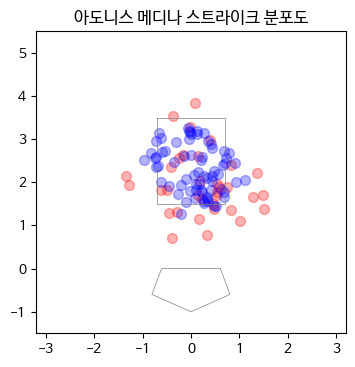

In [ ]:
# 헛스윙
S = ado.loc[(ado.description=='swinging_strike') | (ado.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = ado.loc[(ado.description=='called_strike')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('아도니스 메디나 스트라이크 분포도')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

- 싱킹 패스트볼을 이용해 낮은 로케이션에서 스윙 스트라이크를 유도한 것을 볼 수 있습니다.

##### 패스트볼(FF) 로케이션

- 우타자 기준 바깥쪽 낮은 공, 좌타자 기준 몸쪽 높은 공을 던지지 않는 것을 볼 수 있습니다.

- 패스트볼로는 볼 아니면 인플레이 타구 연결의 비율이 높습니다.

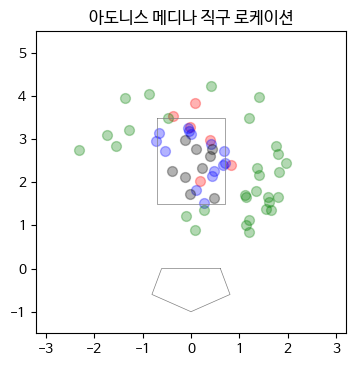

In [ ]:
# 직구
adoff = ado[(ado['pitch_type']=="FF")]

# 헛스윙
S = adoff.loc[(adoff.description=='swinging_strike') | (adoff.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = adoff.loc[(adoff.description=='called_strike')]

# 볼
BB = adoff.loc[(adoff['description']=='blocked_ball') | (adoff['description']=='ball')]

# 타격
H = adoff.loc[(adoff.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('아도니스 메디나 직구 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 싱킹 패스트볼(SI) 로케이션

- 싱커의 로케이션은 대부분 우타자 기준 몸쪽 낮은 공, 좌타자 기준 바깥쪽 낮은 공에 형성되어 있습니다.

- 전체적인 로케이션의 형성은 우타자 기준으로 바깥쪽 높은 공에서 몸쪽 낮은 공에 분포가 되있습니다.

- 스윙 스트라이크보다는 콜 스트라이크로 얻어낸 공들이 많습니다.

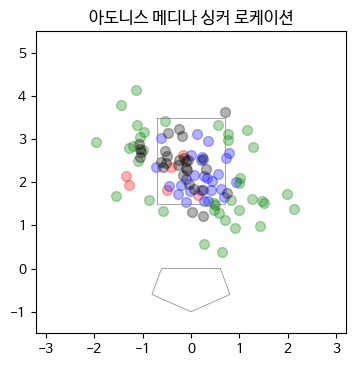

In [ ]:
# 싱커
adosi = ado[(ado['pitch_type']=="SI")]

# 헛스윙
S = adosi.loc[(adosi.description=='swinging_strike') | (adosi.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = adosi.loc[(adosi.description=='called_strike')]

# 볼
BB = adosi.loc[(adosi['description']=='blocked_ball') | (adosi['description']=='ball')]

# 타격
H = adosi.loc[(adosi.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('아도니스 메디나 싱커 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 슬라이더(SL) 로케이션

- 싱커와 같이 전체적인 로케이션의 형성은 우타자 기준으로 바깥쪽 높은 공에서 몸쪽 낮은 공에 분포가 되있습니다.

- 스윙 스트라이크는 우타자 기준 몸쪽 낮은 볼, 좌타자 기준 바깥쪽 볼에 로케이션이 형성되있습니다.

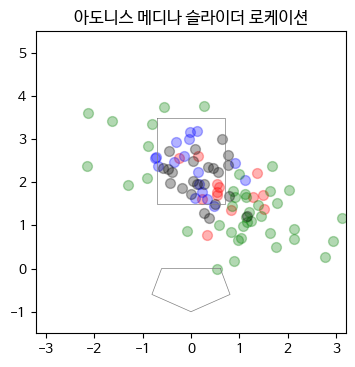

In [ ]:
# 슬라이더
adosl = ado[(ado['pitch_type']=="SL")]

# 헛스윙
S = adosl.loc[(adosl.description=='swinging_strike') | (adosl.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = adosl.loc[(adosl.description=='called_strike')]

# 볼
BB = adosl.loc[(adosl['description']=='blocked_ball') | (adosl['description']=='ball')]

# 타격
H = adosl.loc[(adosl.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('아도니스 메디나 슬라이더 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 체인지업(CH) 로케이션

- 체인지업의 로케이션은 전체적으로 스트라이크 존 아래쪽에 형성되있습니다.

- 헛스윙 유도, 스트라이크 콜, 볼(유인구) 전부 존 아래쪽에 형성되있습니다.

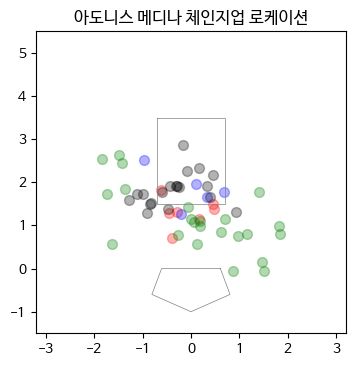

In [ ]:
# 슬라이더
adoch = ado[(ado['pitch_type']=="CH")]

# 헛스윙
S = adoch.loc[(adoch.description=='swinging_strike') | (adoch.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = adoch.loc[(adoch.description=='called_strike')]

# 볼
BB = adoch.loc[(adoch['description']=='blocked_ball') | (adoch['description']=='ball')]

# 타격
H = adoch.loc[(adoch.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('아도니스 메디나 체인지업 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 커브(CU) 로케이션

- 콜 스트라이크는 스트라이크 존 보더 라인에 형성되있습니다.

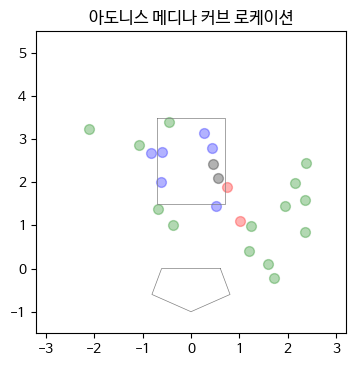

In [ ]:
# 커브
adocu = ado[(ado['pitch_type']=="CU")]

# 헛스윙
S = adocu.loc[(adocu.description=='swinging_strike') | (adocu.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = adocu.loc[(adocu.description=='called_strike')]

# 볼
BB = adocu.loc[(adocu['description']=='blocked_ball') | (adocu['description']=='ball')]

# 타격
H = adocu.loc[(adocu.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('아도니스 메디나 커브 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

#### 투구 위치

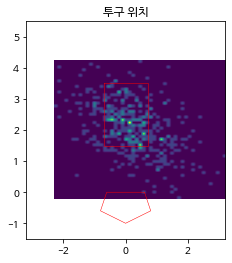

In [ ]:
# Generate some test data
# a,b 값에 투구 자료만 넣으면 된다.
a = ado.plate_x
b = ado.plate_z # a,b 변수로 겹치지 않게 한다.

heatmap, xedges, yedges = np.histogram2d(a, b, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')

plt.plot(x, y, c='red', lw=0.5)
plt.plot(x2, y2, c='red', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('투구 위치')

plt.show();

# a,b와 x,y가 겹치면 안 된다.
# a,b 변수로 겹치지 않게 한 다음에 다시 그 이전으로 돌아가서 먼저 실행한 뒤 재실행 하면 된다.

#### 구종별 로케이션

- 싱커, 슬라이더, 커브의 로케이션이 유사하다.

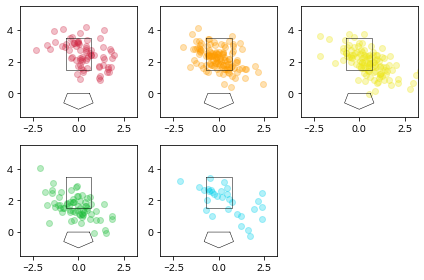

In [ ]:
# 여러 개의 그래프 만들기
# n행 m열의 그래프를 미리 만들지 결정한다.

fig = plt.figure()

axes1 = fig.add_subplot(2,3,1)  # 2행 3열의 1번째
axes2 = fig.add_subplot(2,3,2)
axes3 = fig.add_subplot(2,3,3)
axes4 = fig.add_subplot(2,3,4)
axes5 = fig.add_subplot(2,3,5)

# 커크 맥카티 선수의 구종별 로케이션
FF = ado[ado['pitch_type']=="FF"] # 구종이 FF
SI = ado[ado['pitch_type']=="SI"]
SL = ado[ado['pitch_type']=="SL"]
CH = ado[ado['pitch_type']=="CH"]
CU = ado[ado['pitch_type']=="CU"]


# 국내에서도 baseball savant의 색깔을 사용하는 경우가 많음
axes1.scatter(FF.plate_x, FF.plate_z, c='#D22D49', alpha=0.3)  # Baseball Savant의 직구 표시 색깔 

# x축, y축 범위 지정
# subplot에서는 set.xlim을 해야 한다.
axes1.set_xlim([L-2.5, R+2.5])
axes1.set_ylim([Bot-3, Top+2])

# 홈플레이트, 스트라이크 존
axes1.plot(x, y, c='black', lw=0.5) # 여러 개의 그래프기 때문에 axes를 해야 한다.
axes1.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes2.scatter(SI.plate_x, SI.plate_z, c='#FE9D00', alpha=0.3)
axes2.set_xlim([L-2.5, R+2.5])
axes2.set_ylim([Bot-3, Top+2])

axes2.plot(x, y, c='black', lw=0.5) 
axes2.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes3.scatter(SL.plate_x, SL.plate_z, c='#EEE716', alpha=0.3)
axes3.set_xlim([L-2.5, R+2.5])
axes3.set_ylim([Bot-3, Top+2])

axes3.plot(x, y, c='black', lw=0.5) 
axes3.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes4.scatter(CH.plate_x, CH.plate_z, c='#1DBE3A', alpha=0.3)
axes4.set_xlim([L-2.5, R+2.5])
axes4.set_ylim([Bot-3, Top+2])

axes4.plot(x, y, c='black', lw=0.5) 
axes4.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes5.scatter(CU.plate_x, CU.plate_z, c='#00D1ED', alpha=0.3)
axes5.set_xlim([L-2.5, R+2.5])
axes5.set_ylim([Bot-3, Top+2])

axes5.plot(x, y, c='black', lw=0.5) 
axes5.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------

# 틀끼리 겹치지 말게 하기
fig.tight_layout();

#### 구종별 로케이션(등고선)

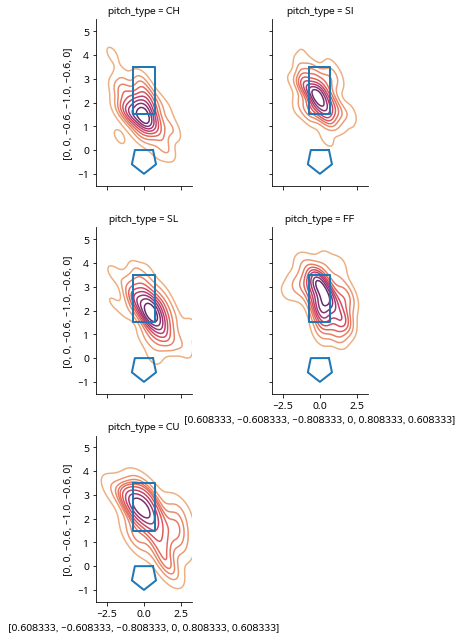

In [ ]:
g = sns.FacetGrid(ado, col='pitch_type', col_wrap=2, height=3, ylim=(Bot-3, Top+2), xlim=(L-2.5, R+2.5))
g.map(sns.kdeplot, 'plate_x', 'plate_z', cmap='flare')
g.map_dataframe(plt.plot, x2, y2, '-', linewidth=2) # 스트라이크 존 추가
g.map_dataframe(plt.plot, x, y, '-', linewidth=2);  # 홈 플레이트 추가

# 옵션
# col_wrap = : 최대 열 갯수
# height = : 최대 행 갯수
# xlim, ylim : 범위 제한
# cmap : 색상 팔레트

#### 좌,우 로케이션

- 구사 비율이 높은 싱킹 패스트볼, 슬라이더의 경우에는 투구 로케이션이 일정합니다.

- 직구의 경우 우타자들에게는 높게 로케이션을 잡고 있고, 좌타자들에게는 낮게 로케이션을 잡고 있습니다.

- 커브의 경우 로케이션 차이가 극명하게 갈립니다. 우타자들에게는 바깥쪽으로 구사를 하고 있으며, 좌타자들에게는 대부분을 바깥쪽 낮은 공에 던지는 것을 볼 수 있습니다.

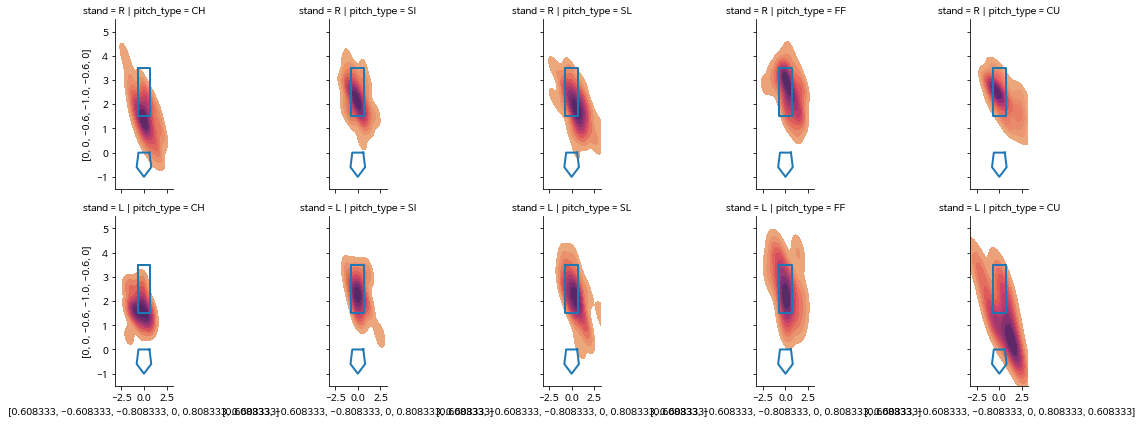

In [ ]:
# 좌,우 타자 로케이션도 똑같은지 확인해보기
g = sns.FacetGrid(ado, col='pitch_type', row='stand', ylim=(Bot-3, Top+2), xlim=(L-2.5, R+2.5))
g.map(sns.kdeplot, 'plate_x', 'plate_z', cmap='flare', shade=True)
g.map_dataframe(plt.plot, x2, y2, '-', linewidth=2) # 스트라이크 존 추가
g.map_dataframe(plt.plot, x, y, '-', linewidth=2)  # 홈 플레이트 추가

fig.tight_layout();
# 옵션
# col_wrap = : 최대 열 갯수
# height = : 최대 행 갯수
# xlim, ylim : 범위 제한
# cmap : 색상 팔레트

#### 구종별 익스텐션

- 체인지업의 익스텐션과 슬라이더의 익스텐션의 차이가 5cm 정도 있는 것을 볼 수 있습니다.

- 모든 구종이 익스텐션이 메디나 선수의 신장보다 낮습니다. 정통 오버스로는 아님을 알 수 있습니다.

In [ ]:
round(ado.groupby('pitch_type')['release_extension'].agg(['mean']),1)

,mean
pitch_type,
CH,183.5
CU,180.0
FF,179.2
SI,182.1
SL,178.5


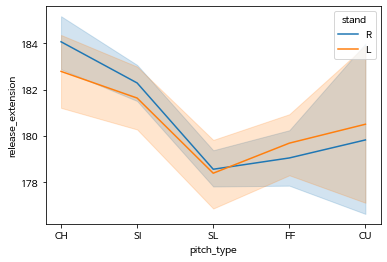

In [ ]:
sns.lineplot(x='pitch_type', y='release_extension', hue='stand', data=ado);

#### 2스트라이크 이후 투구

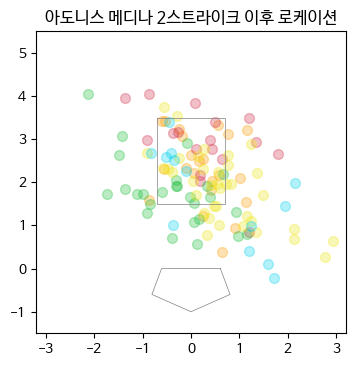

In [ ]:
ado2 = ado[ado.strikes>=2]

# 패스트볼
ado2ff = ado2[(ado2['pitch_type']=="FF")]

# 싱커
ado2si = ado2[(ado2['pitch_type']=="SI")]

# 슬라이더
ado2sl = ado2[(ado2['pitch_type']=="SL")]

# 체인지업
ado2ch = ado2[(ado2['pitch_type']=="CH")]

# 커브
ado2cu = ado2[(ado2['pitch_type']=="CU")]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('아도니스 메디나 2스트라이크 이후 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(ado2si['plate_x'], ado2si['plate_z'], s=50, color='#FE9D00', alpha=alpha_) 
plt.scatter(ado2ff['plate_x'], ado2ff['plate_z'], s=50, color='#D22D49', alpha=alpha_)   
plt.scatter(ado2ch['plate_x'], ado2ch['plate_z'], s=50, color='#1DBE3A', alpha=alpha_)
plt.scatter(ado2sl['plate_x'], ado2sl['plate_z'], s=50, color='#EEE716', alpha=alpha_)
plt.scatter(ado2cu['plate_x'], ado2cu['plate_z'], s=50, color='#00D1ED', alpha=alpha_)
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

#### 무브먼트

,pfx_x,pfx_z
pitch_type,,
CH,40.410296,1.038087
CU,-38.041006,5.869858
FF,13.615792,29.323430
SI,39.687398,16.105632
SL,-12.685986,6.521669


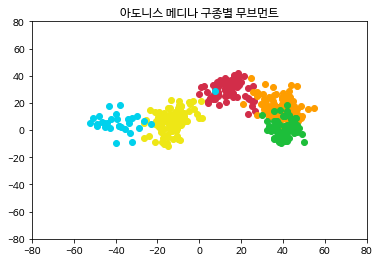

In [ ]:
FF=ado.loc[ado.pitch_type == 'FF']  #직구
SI=ado.loc[ado.pitch_type == 'SI']  #싱커
CH=ado.loc[ado.pitch_type == 'CH']  #체인지업
SL=ado.loc[ado.pitch_type == 'SL']  #슬라이더
CU=ado.loc[ado.pitch_type == 'CU']  #커브

plt.scatter(FF['pfx_x'],FF['pfx_z'], c='#D22D49')
plt.scatter(SI['pfx_x'],SI['pfx_z'], c='#FE9D00')
plt.scatter(CH['pfx_x'],CH['pfx_z'], c='#1DBE3A')
plt.scatter(SL['pfx_x'],SL['pfx_z'], c='#EEE716')
plt.scatter(CU['pfx_x'],CU['pfx_z'], c='#00D1ED')

plt.xlim([-80, 80])
plt.ylim([-80, 80])
plt.title('아도니스 메디나 구종별 무브먼트')

ado.groupby('pitch_type')['pfx_x','pfx_z'].mean()

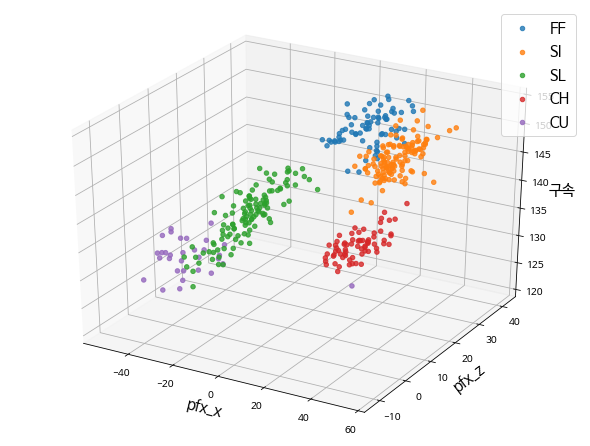

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig) 
# ax.view_init(50,80)
for i_ in ['FF', 'SI', 'SL', 'CH', 'CU']:
  tt = ado[ado["pitch_type"]==i_] # 순서대로 내려가면서 투구 데이터 하나가 구종과 맞으면 하나씩 저장
  ax.scatter(tt["pfx_x"], tt['pfx_z'], tt['release_speed'], alpha=.8,label=i_,) # 맞는 데이터는 산점도 생성
ax.legend(fontsize=15)

ax.set_xlabel('pfx_x', fontsize=15)
ax.set_ylabel('pfx_z', fontsize=15)
ax.set_zlabel('구속', fontsize=15)

plt.show() 

## NC 다이노스

- NC 다이노스는 5월 부진을 겪으면서 10위로 추락하기까지 했습니다. 이로 인해 이동욱 감독이 성적 부진으로 경질되었습니다. 이후 강인권 감독대행이 부임하면서 팀 성적이 점차 반등하여 시즌을 6위로 마감했습니다.

- 2022년에는 드류 루친스키, 웨스 파슨스 선수와 재계약, 닉 마티니 선수를 영입하며 시즌을 시작했습니다.

- 웨스 파슨스 선수는 성적 부진으로 방출되어 대체 선수인 맷 더모디 선수로 시즌을 이어갔습니다. 루친스키 선수와 마티니 선수는 평균 이상의 활약을 해주었습니다.

- 루친스키 선수는 오클랜드 애슬레틱스와 1+1년 총액 800만 달러의 계약을 맺으며 이적했습니다. 맷 더모디, 닉 마티니 선수와도 재계약을 하지 않았습니다. NC는 2023시즌을 앞두고 새로운 외국인 투수 에릭 페디, 테일러 와이드너, 외국인 타자 제이슨 마틴 선수를 영입했습니다.

### 에릭 페디(Erick James Fedde)

- 생년월일 : 1993.2.25
- 국적 : 미국
- 신체 : 195cm, 92kg
- 포지션 : 투수
- 투타 : 우투우타
- 프로입단 : 2014년 드래프트 1라운드(전체 18순위)

#### 2022시즌 성적
> 27G(선발 27G) 127이닝, 6승 13패, 평균자책점 5.81, 94탈삼진, WHIP 1.63

#### 구종별 평균 구속, 최고 구속

In [ ]:
fed = pd.read_csv('/content/drive/MyDrive/baseball_project/player/607200_data.csv')

In [ ]:
fed['release_extension'] = fed['release_extension'] * 30.48 # 피트 단위 변경
fed['release_pos_x'] = fed['release_pos_x'] * (-30.48)
fed['release_pos_y'] = fed['release_pos_y'] * 30.48
fed['release_pos_z'] = fed['release_pos_z'] * 30.48
# 주의 : 위 데이터는 포수 시점이다. 투수 시점으로 바꾸려면 x 값들에는 -1을 곱해야 한다.

# 무브먼트
fed['pfx_x']=fed['pfx_x']*(-30.48)  # 투수 시점으로 보기 때문에 -1을 곱해야 한다(x축 반전).
fed['pfx_z']=fed['pfx_z']*30.48

# 구속
fed['release_speed'] = fed['release_speed'] * 1.60934

# 효과구속
# df['effective_speed'] = df['effective_speed'] * 1.60934

# 로케이션의 경우는 스트라이크 존을 봐야 하기 때문에 바꾸지 않는다.
# 피트를 단위변환하지 않는 경우도 있다.

In [ ]:
fed

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SI,2022-10-05,147.576478,44.1960,175.2600,"Fedde, Erick",605253,607200,single,hit_into_play,...,0,0,9,9,0,Standard,Standard,204,0.001,0.237
1,SI,2022-10-05,148.863950,44.5008,178.0032,"Fedde, Erick",605253,607200,NaN,ball,...,0,0,9,9,0,Standard,Standard,192,0.000,0.033
2,FC,2022-10-05,144.357798,49.9872,170.6880,"Fedde, Erick",605253,607200,NaN,ball,...,0,0,9,9,0,Standard,Standard,205,0.000,0.016
3,SI,2022-10-05,147.093676,48.7680,178.3080,"Fedde, Erick",605253,607200,NaN,called_strike,...,0,0,9,9,0,Standard,Standard,204,0.000,-0.024
4,CU,2022-10-05,126.333190,53.9496,164.2872,"Fedde, Erick",543510,607200,home_run,hit_into_play,...,0,0,9,9,0,Standard,Standard,58,0.020,1.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,CH,2022-04-10,136.150164,64.9224,167.3352,"Fedde, Erick",596019,607200,NaN,called_strike,...,0,0,0,0,0,Infield shift,Standard,239,0.000,-0.031
2416,SI,2022-04-10,148.220214,48.1584,178.3080,"Fedde, Erick",596019,607200,NaN,ball,...,0,0,0,0,0,Infield shift,Standard,202,0.000,0.023
2417,CU,2022-04-10,127.459728,62.4840,173.1264,"Fedde, Erick",607043,607200,strikeout,swinging_strike_blocked,...,0,0,0,0,0,Infield shift,Standard,65,0.022,-0.141
2418,SI,2022-04-10,149.024884,44.8056,178.6128,"Fedde, Erick",607043,607200,NaN,called_strike,...,0,0,0,0,0,Infield shift,Standard,192,0.000,-0.046


In [ ]:
fed1 = fed.groupby('pitch_type')['release_speed'].agg(['mean', 'max', 'count'])
fed1['mean'] = round(fed1['mean'],1)
fed1['max'] = round(fed1['max'],1)
fed1

,mean,max,count
pitch_type,,,
CH,138.4,143.6,87
CU,126.2,132.4,695
FC,143.5,150.2,668
SI,148.9,154.7,970


- 에릭 페디 선수는 2022년에 총 2420구를 던졌으며 4개의 구종을 구사했습니다.

- 4개의 구종 중 싱킹 패스트볼, 컷 패스트볼, 커브의 구사율 합계가 96%입니다.

- 싱킹 패스트볼의 평균 구속은 148.9km/h이며, 최고 구속은 154.7km입니다. 2022년 KBO 리그에서 싱킹 패스트볼을 50구 이상 던진 선수들은 55명입니다. 에릭 페디 선수의 싱킹 패스트볼 평균 구속은 KBO에서는 4위(상위 7%)에 해당하는 수치입니다. 에릭 페디 선수와 비슷한 싱킹 패스트볼 구속을 가진 선수는 앨버트 수아레즈(149.6km/h), 드류 루친스키(148.1km/h)입니다.

#### 구종별 회전수 평균

In [ ]:
fed2 = round(fed.groupby('pitch_type')['release_spin_rate'].agg(['mean']))
fed2['mean'] = fed2['mean'].astype(int)
fed2

,mean
pitch_type,
CH,1516
CU,2389
FC,2123
SI,1877


#### 스트라이크 로케이션

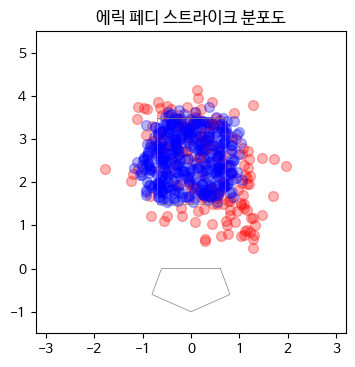

In [ ]:
# 헛스윙
S = fed.loc[(fed.description=='swinging_strike') | (fed.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = fed.loc[(fed.description=='called_strike')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('에릭 페디 스트라이크 분포도')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

- 앞선 세명의 선수보다 피칭 데이터가 많기 때문에 콜 스트라이크, 스윙 스트라이크 분포도가 진합니다.

- 좌타자 기준으로 바깥쪽 낮은 공에 스윙 스트라이크의 분포가 많은 편입니다.

##### 싱킹 패스트볼(SI) 로케이션

- 싱킹 패스트볼의 헛스윙은 스트라이크 존 위쪽에 많이 형성되있습니다.

- 싱킹 패스트볼의 콜 스트라이크는 스트라이크 존 안쪽, 바깥쪽 보더라인에 로케이션이 형성되있습니다.

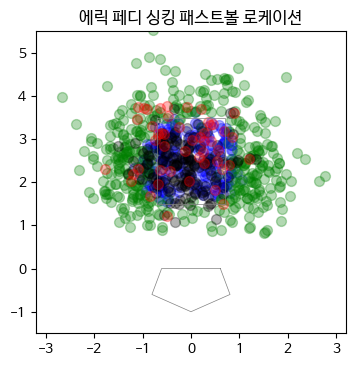

In [ ]:
# 싱커
fedsi = fed[(fed['pitch_type']=="SI")]

# 헛스윙
S = fedsi.loc[(fedsi.description=='swinging_strike') | (fedsi.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = fedsi.loc[(fedsi.description=='called_strike')]

# 볼
BB = fedsi.loc[(fedsi['description']=='blocked_ball') | (fedsi['description']=='ball')]

# 타격
H = fedsi.loc[(fedsi.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('에릭 페디 싱킹 패스트볼 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 컷 패스트볼(FC) 로케이션

- 컷 패스트볼은 우타자 기준으로는 바깥쪽 위, 몸쪽 위와 아래 부분에 로케이션이 형성되어 있으며, 좌타자 기준으로는 몸쪽 위, 바깥쪽 위와 아래 부분에 형성되있습니다.

- 컷 패스트볼의 대부분을 스트라이크 존 위쪽으로 구사하고 있습니다.

- 좌타자들에게는 바깥쪽 낮은 코스로 던져 헛스윙을 유도하고 있습니다.

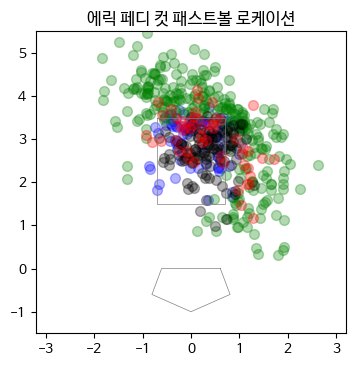

In [ ]:
# 커터
fedfc = fed[(fed['pitch_type']=="FC")]

# 헛스윙
S = fedfc.loc[(fedfc.description=='swinging_strike') | (fedfc.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = fedfc.loc[(fedfc.description=='called_strike')]

# 볼
BB = fedfc.loc[(fedfc['description']=='blocked_ball') | (fedfc['description']=='ball')]

# 타격
H = fedfc.loc[(fedfc.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('에릭 페디 컷 패스트볼 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 커브(CU) 로케이션

- 커브는 우타자 기준 몸쪽 낮은 코스, 좌타자 기준 바깥쪽 낮은 코스로 구사하여 헛스윙을 유도하고 있습니다.

- 전반적으로 커브의 로케이션은 스트라이크 존 아래쪽으로 형성되있습니다.

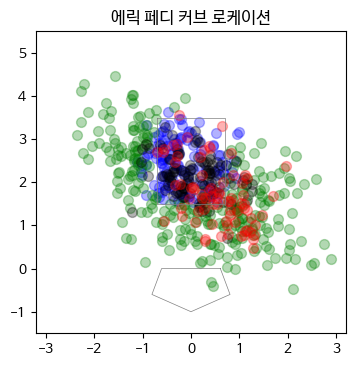

In [ ]:
# 커터
fedcu = fed[(fed['pitch_type']=="CU")]

# 헛스윙
S = fedcu.loc[(fedcu.description=='swinging_strike') | (fedcu.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = fedcu.loc[(fedcu.description=='called_strike')]

# 볼
BB = fedcu.loc[(fedcu['description']=='blocked_ball') | (fedcu['description']=='ball')]

# 타격
H = fedcu.loc[(fedcu.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('에릭 페디 커브 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 체인지업(CH) 로케이션

- 체인지업의 로케이션은 대부분 스트라이크 존 아래에 형성되있습니다.

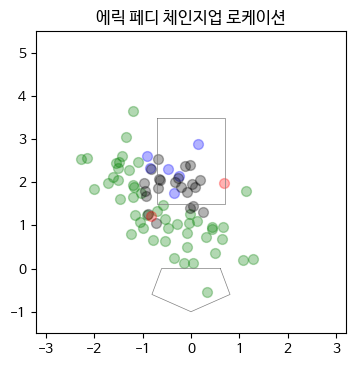

In [ ]:
# 체인지업
fedch = fed[(fed['pitch_type']=="CH")]

# 헛스윙
S = fedch.loc[(fedch.description=='swinging_strike') | (fedch.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = fedch.loc[(fedch.description=='called_strike')]

# 볼
BB = fedch.loc[(fedch['description']=='blocked_ball') | (fedch['description']=='ball')]

# 타격
H = fedch.loc[(fedch.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('에릭 페디 체인지업 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

#### 투구 위치

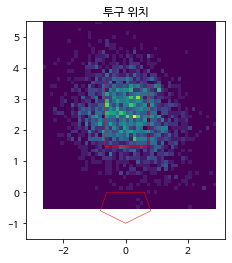

In [ ]:
# Generate some test data
# a,b 값에 투구 자료만 넣으면 된다.
a = fed.plate_x
b = fed.plate_z # a,b 변수로 겹치지 않게 한다.

heatmap, xedges, yedges = np.histogram2d(a, b, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')

plt.plot(x, y, c='red', lw=0.5)
plt.plot(x2, y2, c='red', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('투구 위치')

plt.show();

# a,b와 x,y가 겹치면 안 된다.
# a,b 변수로 겹치지 않게 한 다음에 다시 그 이전으로 돌아가서 먼저 실행한 뒤 재실행 하면 된다.

#### 구종별 로케이션

- 싱커의 경우에는 수평으로 로케이션이 형성되있습니다. 스트라이크 존 위,아래로 구사하지 않는 것을 볼 수 있습니다.

- 커터를 던지지 않는 코스에는 체인지업을 던져서 피칭 구성을 하는 것을 볼 수 있습니다.

- 스트라이크 존 위쪽에는 패스트볼 계열, 아래쪽에는 커터와 변화구를 던지는 것을 볼 수 있습니다.

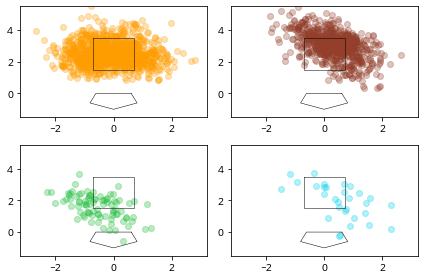

In [ ]:
# 여러 개의 그래프 만들기
# n행 m열의 그래프를 미리 만들지 결정한다.

fig = plt.figure()

axes1 = fig.add_subplot(2,2,1)  # 2행 2열의 1번째
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

# 에릭 페디 선수의 구종별 로케이션
SI = fed[fed['pitch_type']=="SI"] # 구종이 SI
FC = fed[fed['pitch_type']=="FC"]
CH = fed[fed['pitch_type']=="CH"]
CU = fed[fed['pitch_type']=="CU"]


# 국내에서도 baseball savant의 색깔을 사용하는 경우가 많음
axes1.scatter(SI.plate_x, SI.plate_z, c='#FE9D00', alpha=0.3)  # Baseball Savant의 직구 표시 색깔

# x축, y축 범위 지정
# subplot에서는 set.xlim을 해야 한다.
axes1.set_xlim([L-2.5, R+2.5])
axes1.set_ylim([Bot-3, Top+2])

# 홈플레이트, 스트라이크 존
axes1.plot(x, y, c='black', lw=0.5) # 여러 개의 그래프기 때문에 axes를 해야 한다.
axes1.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes2.scatter(FC.plate_x, FC.plate_z, c='#933F2C', alpha=0.3)
axes2.set_xlim([L-2.5, R+2.5])
axes2.set_ylim([Bot-3, Top+2])

axes2.plot(x, y, c='black', lw=0.5) 
axes2.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes3.scatter(CH.plate_x, CH.plate_z, c='#1DBE3A', alpha=0.3)
axes3.set_xlim([L-2.5, R+2.5])
axes3.set_ylim([Bot-3, Top+2])

axes3.plot(x, y, c='black', lw=0.5) 
axes3.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes4.scatter(KC.plate_x, KC.plate_z, c='#00D1ED', alpha=0.3)
axes4.set_xlim([L-2.5, R+2.5])
axes4.set_ylim([Bot-3, Top+2])

axes4.plot(x, y, c='black', lw=0.5) 
axes4.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------

# 틀끼리 겹치지 말게 하기
fig.tight_layout();

#### 구종별 로케이션(등고선)

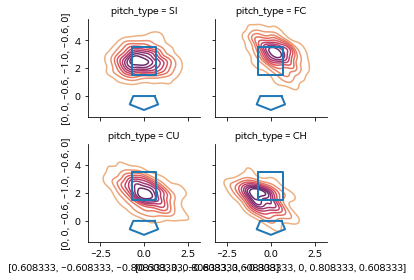

In [ ]:
g = sns.FacetGrid(fed, col='pitch_type', col_wrap=2, height=2, ylim=(Bot-3, Top+2), xlim=(L-2.5, R+2.5))
g.map(sns.kdeplot, 'plate_x', 'plate_z', cmap='flare')
g.map_dataframe(plt.plot, x2, y2, '-', linewidth=2) # 스트라이크 존 추가
g.map_dataframe(plt.plot, x, y, '-', linewidth=2);  # 홈 플레이트 추가

# 옵션
# col_wrap = : 최대 열 갯수
# height = : 최대 행 갯수
# xlim, ylim : 범위 제한
# cmap : 색상 팔레트

#### 좌,우 로케이션

- 싱킹 패스트볼의 경우에는 좌,우 타자의 몸쪽으로 로케이션이 형성되어있음을 볼 수 있습니다.

- 커브의 경우 좌,우 타자의 몸쪽 낮은 곳으로 구사를 하는 것을 볼 수 있습니다.

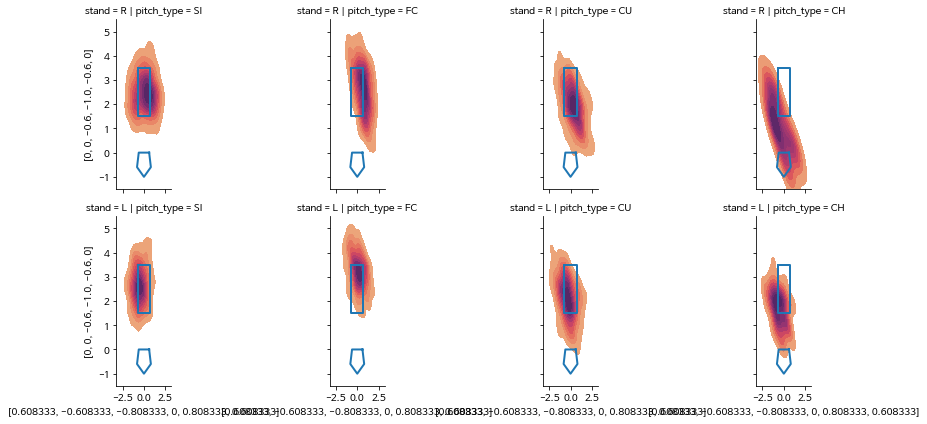

In [ ]:
# 좌,우 타자 로케이션도 똑같은지 확인해보기
g = sns.FacetGrid(fed, col='pitch_type', row='stand', ylim=(Bot-3, Top+2), xlim=(L-2.5, R+2.5))
g.map(sns.kdeplot, 'plate_x', 'plate_z', cmap='flare', shade=True)
g.map_dataframe(plt.plot, x2, y2, '-', linewidth=2) # 스트라이크 존 추가
g.map_dataframe(plt.plot, x, y, '-', linewidth=2)  # 홈 플레이트 추가

fig.tight_layout();
# 옵션
# col_wrap = : 최대 열 갯수
# height = : 최대 행 갯수
# xlim, ylim : 범위 제한
# cmap : 색상 팔레트

#### 구종별 익스텐션

- 체인지업을 구사할때를 제외하고는 우타자를 상대할 때의 익스텐션이 좌타를 상대할 때보다 높은 것을 알 수 있습니다.

- 패스트볼 계열을 구사할 때는 익스텐션이 높아지는 것을 알 수 있습니다. 변화구와는 3~7cm 차이가 있음을 볼 수 있습니다.

In [ ]:
round(fed.groupby('pitch_type')['release_extension'].agg(['mean']),1)

,mean
pitch_type,
CH,197.8
CU,197.6
FC,200.7
SI,204.9


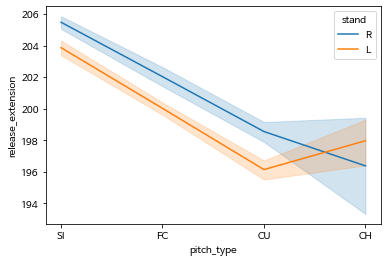

In [ ]:
sns.lineplot(x='pitch_type', y='release_extension', hue='stand', data=fed);

#### 2스트라이크 이후 투구

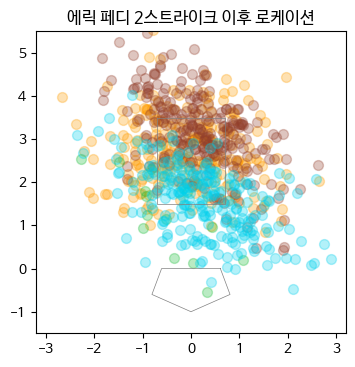

In [ ]:
fed2 = fed[fed.strikes>=2]

# 싱커
fed2si = fed2[(fed2['pitch_type']=="SI")]

# 커터
fed2fc = fed2[(fed2['pitch_type']=="FC")]

# 체인지업
fed2ch = fed2[(fed2['pitch_type']=="CH")]

# 커브
fed2cu = fed2[(fed2['pitch_type']=="CU")]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('에릭 페디 2스트라이크 이후 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(fed2si['plate_x'], fed2si['plate_z'], s=50, color='#FE9D00', alpha=alpha_)   
plt.scatter(fed2fc['plate_x'], fed2fc['plate_z'], s=50, color='#933F2C', alpha=alpha_)
plt.scatter(fed2ch['plate_x'], fed2ch['plate_z'], s=50, color='#1DBE3A', alpha=alpha_)
plt.scatter(fed2cu['plate_x'], fed2cu['plate_z'], s=50, color='#00D1ED', alpha=alpha_)
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

#### 무브먼트

,pfx_x,pfx_z
pitch_type,,
CH,36.999917,5.938345
CU,-37.446982,-5.324132
FC,-4.507663,19.102017
SI,22.281194,24.840886


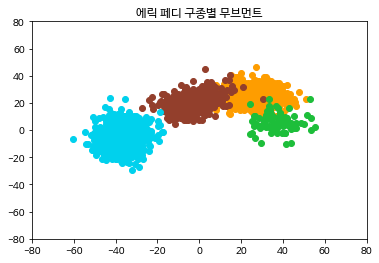

In [ ]:
SI=fed.loc[fed.pitch_type == 'SI']  #싱커
FC=fed.loc[fed.pitch_type == 'FC']  #커터
CU=fed.loc[fed.pitch_type == 'CU']  #커브
CH=fed.loc[fed.pitch_type == 'CH']  #체인지업

plt.scatter(SI['pfx_x'],SI['pfx_z'], c='#FE9D00')
plt.scatter(FC['pfx_x'],FC['pfx_z'], c='#933F2C')
plt.scatter(CU['pfx_x'],CU['pfx_z'], c='#00D1ED')
plt.scatter(CH['pfx_x'],CH['pfx_z'], c='#1DBE3A')

plt.xlim([-80, 80])
plt.ylim([-80, 80])
plt.title('에릭 페디 구종별 무브먼트')

fed.groupby('pitch_type')['pfx_x','pfx_z'].mean()

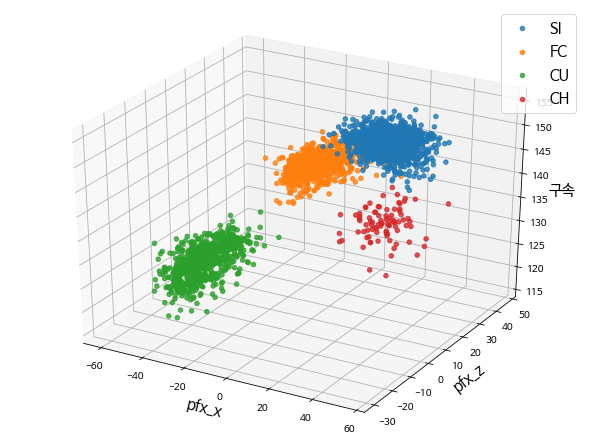

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig) 
# ax.view_init(50,80)
for i_ in ['SI', 'FC', 'CU', 'CH']:
  tt = fed[fed["pitch_type"]==i_] # 순서대로 내려가면서 투구 데이터 하나가 구종과 맞으면 하나씩 저장
  ax.scatter(tt["pfx_x"], tt['pfx_z'], tt['release_speed'], alpha=.8,label=i_,) # 맞는 데이터는 산점도 생성
ax.legend(fontsize=15)

ax.set_xlabel('pfx_x', fontsize=15)
ax.set_ylabel('pfx_z', fontsize=15)
ax.set_zlabel('구속', fontsize=15)

plt.show() 

### 테일러 와이드너(Taylor Browning Widener)

- 생년월일 : 1994.10.24
- 국적 : 미국
- 신체 : 182cm, 92kg
- 포지션 : 투수
- 투타 : 우투좌타
- 프로입단 : 2016년 드래프트 12라운드(전체 368순위)

#### 2022시즌 성적
> 14G 17.1이닝, 1패, 평균자책점 3.63, 14탈삼진, WHIP 1.56

#### 2021시즌 성적
> 23G(선발 13G) 70.1이닝, 2승 1패, 평균자책점 4.35, 73탈삼진, WHIP 1.45

* NC 다이노스에서는 선발 투수로 영입한 선수기 때문에 선발 경험이 있는 2021년의 기록을 토대로 분석해보도록 하겠습니다.

#### 구종별 평균 구속, 최고 구속

In [ ]:
tay = pd.read_csv('/content/drive/MyDrive/baseball_project/player/642203_data.csv')

In [ ]:
tay['release_extension'] = tay['release_extension'] * 30.48 # 피트 단위 변경
tay['release_pos_x'] = tay['release_pos_x'] * (-30.48)
tay['release_pos_y'] = tay['release_pos_y'] * 30.48
tay['release_pos_z'] = tay['release_pos_z'] * 30.48
# 주의 : 위 데이터는 포수 시점이다. 투수 시점으로 바꾸려면 x 값들에는 -1을 곱해야 한다.

# 무브먼트
tay['pfx_x']=tay['pfx_x']*(-30.48)  # 투수 시점으로 보기 때문에 -1을 곱해야 한다(x축 반전).
tay['pfx_z']=tay['pfx_z']*30.48

# 구속
tay['release_speed'] = tay['release_speed'] * 1.60934

# 효과구속
# df['effective_speed'] = df['effective_speed'] * 1.60934

# 로케이션의 경우는 스트라이크 존을 봐야 하기 때문에 바꾸지 않는다.
# 피트를 단위변환하지 않는 경우도 있다.

In [ ]:
tay

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2021-10-03,153.048234,67.3608,165.5064,"Widener, Taylor",641658,642203,field_out,hit_into_play,...,1,4,1,4,1,Standard,Standard,211.0,0.017,-0.246
1,FF,2021-10-03,150.151422,80.4672,160.6296,"Widener, Taylor",641658,642203,NaN,foul,...,1,4,1,4,1,Standard,Standard,214.0,0.000,-0.095
2,SL,2021-10-03,137.115768,73.1520,168.2496,"Widener, Taylor",641658,642203,NaN,blocked_ball,...,1,4,1,4,1,Standard,Standard,62.0,0.000,0.012
3,FF,2021-10-03,151.438894,78.0288,161.5440,"Widener, Taylor",641658,642203,NaN,called_strike,...,1,4,1,4,1,Standard,Standard,215.0,0.000,-0.039
4,FF,2021-10-03,153.852904,81.9912,157.2768,"Widener, Taylor",606132,642203,field_out,hit_into_play,...,1,4,1,4,1,Standard,Standard,221.0,0.011,-0.226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,FF,2021-04-04,148.703016,91.1352,155.1432,"Widener, Taylor",592518,642203,field_out,hit_into_play,...,2,2,0,0,2,Standard,Standard,210.0,-0.010,0.038
1212,FF,2021-04-04,149.024884,93.2688,156.6672,"Widener, Taylor",592518,642203,NaN,called_strike,...,2,2,0,0,2,Standard,Standard,206.0,0.000,-0.018
1213,FF,2021-04-04,148.059280,84.7344,159.7152,"Widener, Taylor",630105,642203,field_out,hit_into_play,...,2,2,0,0,2,Standard,Standard,217.0,-0.016,-0.136
1214,FF,2021-04-04,149.185818,86.8680,161.8488,"Widener, Taylor",630105,642203,NaN,called_strike,...,2,2,0,0,2,Standard,Standard,216.0,0.000,-0.027


In [ ]:
tay1 = tay.groupby('pitch_type')['release_speed'].agg(['mean', 'max', 'count'])
tay1['mean'] = round(tay1['mean'],1)
tay1['max'] = round(tay1['max'],1)
tay1

,mean,max,count
pitch_type,,,
CH,137.8,143.4,194
FC,137.9,137.9,1
FF,149.0,156.1,809
SL,135.1,141.5,212


- 테일러 와이드너 선수의 2021년 기록입니다. 총 1216구를 던졌습니다.

- 커터 1구를 제외하면 3개의 구종(패스트볼, 슬라이더, 체인지업)을 구사하는 선수입니다. 그 중에서 속구 계열의 구사율이 66.6%입니다. 대부분의 공을 속구 위주로 던지는 선수임을 알 수 있습니다.

- 패스트볼의 평균 구속은 149km/h, 최고 구속은 156.1km입니다. 와이드너 선수와 비슷한 직구 평균 구속과 구사율을 가진 KBO 선수는 2022년의 윌머 폰트(직구 평균 구속 149km/h, 구사율 66.2%) 선수가 있습니다.

#### 구종별 회전수 평균

In [ ]:
tay2 = round(tay.groupby('pitch_type')['release_spin_rate'].agg(['mean']))
tay2['mean'] = tay2['mean'].astype(int)
tay2

,mean
pitch_type,
CH,1713
FC,2000
FF,2144
SL,2239


#### 스트라이크 로케이션

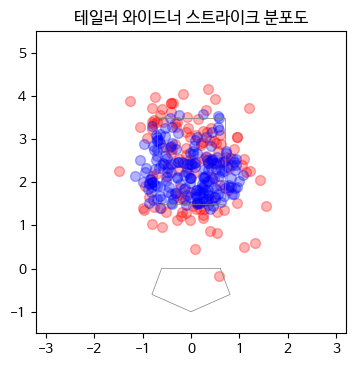

In [ ]:
# 헛스윙
S = tay.loc[(tay.description=='swinging_strike') | (tay.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = tay.loc[(tay.description=='called_strike')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('테일러 와이드너 스트라이크 분포도')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

- 콜 스트라이크가 스트라이크 존 한복판을 기준으로 아랫쪽에 많이 형성된 것을 볼 수 있습니다.

##### 패스트볼(FF) 로케이션

- 스트라이크 존 한복판으로 던져 헛스윙을 이끌어낸 것을 볼 수 있습니다. 또는 스트라이크 존 위로 던져 하이 패스트볼로 헛스윙을 만들었습니다.

- 패스트볼 로케이션이 11시 방향에서 5시 방향으로 형성된 것을 볼 수 있습니다.

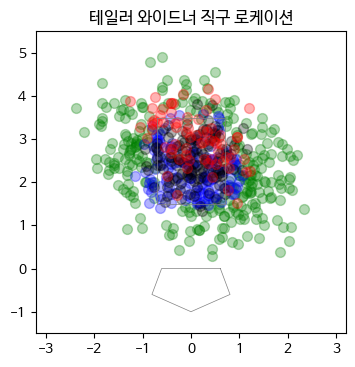

In [ ]:
# 직구
tayff = tay[(tay['pitch_type']=="FF")]

# 헛스윙
S = tayff.loc[(tayff.description=='swinging_strike') | (tayff.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = tayff.loc[(tayff.description=='called_strike')]

# 볼
BB = tayff.loc[(tayff['description']=='blocked_ball') | (tayff['description']=='ball')]

# 타격
H = tayff.loc[(tayff.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('테일러 와이드너 직구 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3

plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 슬라이더(SL) 로케이션

- 우타자 기준 몸쪽 낮은 코스, 좌타자 기준 바깥쪽 낮은 코스에 던져 헛스윙을 유도하는 것을 볼 수 있습니다.

- 전체적인 로케이션은 스트라이크 존 아래쪽으로 형성되있습니다.

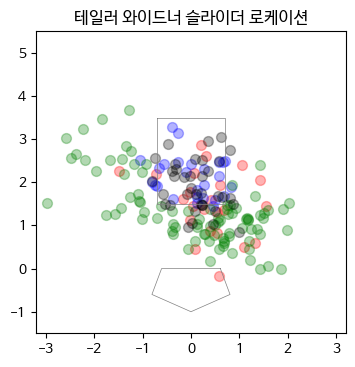

In [ ]:
# 슬라이더
taysl = tay[(tay['pitch_type']=="SL")]

# 헛스윙
S = taysl.loc[(taysl.description=='swinging_strike') | (taysl.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = taysl.loc[(taysl.description=='called_strike')]

# 볼
BB = taysl.loc[(taysl['description']=='blocked_ball') | (taysl['description']=='ball')]

# 타격
H = taysl.loc[(taysl.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('테일러 와이드너 슬라이더 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

##### 체인지업(CH) 로케이션

- 슬라이더와 전체적인 로케이션은 같지만 차이점은 체인지업은 우타자 기준 바깥쪽 낮은 코스, 좌타자 기준 안쪽 낮은 코스에 헛스윙을 유도하는 것을 볼 수 있습니다.

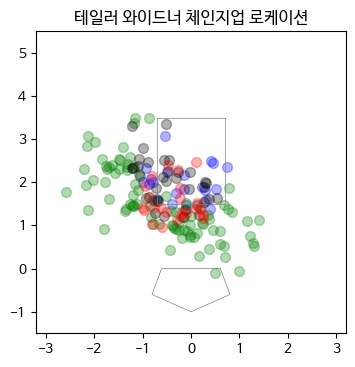

In [ ]:
# 체인지업
taych = tay[(tay['pitch_type']=="CH")]

# 헛스윙
S = taych.loc[(taych.description=='swinging_strike') | (taych.description=='swinging_strike_blocked')]

# 스트라이크 콜
B = taych.loc[(taych.description=='called_strike')]

# 볼
BB = taych.loc[(taych['description']=='blocked_ball') | (taych['description']=='ball')]

# 타격
H = taych.loc[(taych.description=='hit_into_play')]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('테일러 와이드너 체인지업 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(B['plate_x'], B['plate_z'], s=50, color='blue', alpha=alpha_) # B : 콜 스트라이크
plt.scatter(BB['plate_x'], BB['plate_z'], s=50, color='green', alpha=alpha_)  # BB : 볼
plt.scatter(H['plate_x'], H['plate_z'], s=50, color='black', alpha=alpha_)  # H : 인플레이 타구
plt.scatter(S['plate_x'], S['plate_z'], s=50, color='red', alpha=alpha_)  # S : 스윙
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

#### 투구 위치

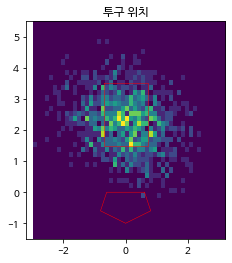

In [ ]:
# Generate some test data
# a,b 값에 투구 자료만 넣으면 된다.
a = tay.plate_x
b = tay.plate_z # a,b 변수로 겹치지 않게 한다.

heatmap, xedges, yedges = np.histogram2d(a, b, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')

plt.plot(x, y, c='red', lw=0.5)
plt.plot(x2, y2, c='red', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('투구 위치')

plt.show();

# a,b와 x,y가 겹치면 안 된다.
# a,b 변수로 겹치지 않게 한 다음에 다시 그 이전으로 돌아가서 먼저 실행한 뒤 재실행 하면 된다.

#### 구종별 로케이션

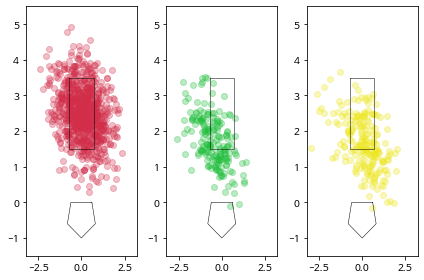

In [ ]:
# 여러 개의 그래프 만들기
# n행 m열의 그래프를 미리 만들지 결정한다.

fig = plt.figure()

axes1 = fig.add_subplot(1,3,1)  # 1행 3열의 1번째
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

# 테일러 와이드너 선수의 구종별 로케이션
FF = tay[tay['pitch_type']=="FF"] # 구종이 FF
CH = tay[tay['pitch_type']=="CH"]
SL = tay[tay['pitch_type']=="SL"]


# 국내에서도 baseball savant의 색깔을 사용하는 경우가 많음
axes1.scatter(FF.plate_x, FF.plate_z, c='#D22D49', alpha=0.3)  # Baseball Savant의 직구 표시 색깔

# x축, y축 범위 지정
# subplot에서는 set.xlim을 해야 한다.
axes1.set_xlim([L-2.5, R+2.5])
axes1.set_ylim([Bot-3, Top+2])

# 홈플레이트, 스트라이크 존
axes1.plot(x, y, c='black', lw=0.5) # 여러 개의 그래프기 때문에 axes를 해야 한다.
axes1.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes2.scatter(CH.plate_x, CH.plate_z, c='#1DBE3A', alpha=0.3)
axes2.set_xlim([L-2.5, R+2.5])
axes2.set_ylim([Bot-3, Top+2])

axes2.plot(x, y, c='black', lw=0.5) 
axes2.plot(x2, y2, c='black', lw=0.5)
#---------------------------------------------------------------------
axes3.scatter(SL.plate_x, SL.plate_z, c='#EEE716', alpha=0.3)
axes3.set_xlim([L-2.5, R+2.5])
axes3.set_ylim([Bot-3, Top+2])

axes3.plot(x, y, c='black', lw=0.5) 
axes3.plot(x2, y2, c='black', lw=0.5)

# 틀끼리 겹치지 말게 하기
fig.tight_layout();

#### 구종별 로케이션(등고선)

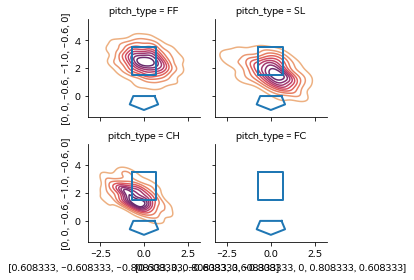

In [ ]:
g = sns.FacetGrid(tay, col='pitch_type', col_wrap=2, height=2, ylim=(Bot-3, Top+2), xlim=(L-2.5, R+2.5))
g.map(sns.kdeplot, 'plate_x', 'plate_z', cmap='flare')
g.map_dataframe(plt.plot, x2, y2, '-', linewidth=2) # 스트라이크 존 추가
g.map_dataframe(plt.plot, x, y, '-', linewidth=2);  # 홈 플레이트 추가

# 옵션
# col_wrap = : 최대 열 갯수
# height = : 최대 행 갯수
# xlim, ylim : 범위 제한
# cmap : 색상 팔레트

#### 좌,우 로케이션

- 슬라이더의 경우 좌,우타자들에게 몸쪽 낮은 코스에 로케이션이 형성되있습니다.

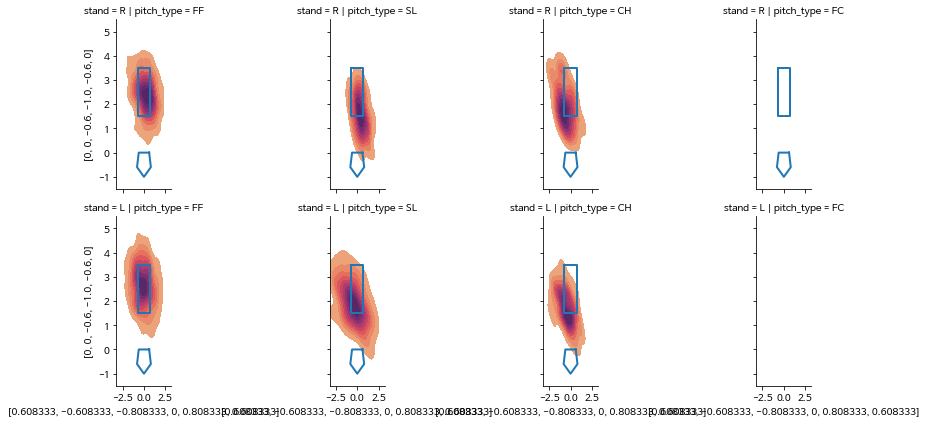

In [ ]:
# 좌,우 타자 로케이션도 똑같은지 확인해보기
g = sns.FacetGrid(tay, col='pitch_type', row='stand', ylim=(Bot-3, Top+2), xlim=(L-2.5, R+2.5))
g.map(sns.kdeplot, 'plate_x', 'plate_z', cmap='flare', shade=True)
g.map_dataframe(plt.plot, x2, y2, '-', linewidth=2) # 스트라이크 존 추가
g.map_dataframe(plt.plot, x, y, '-', linewidth=2)  # 홈 플레이트 추가

fig.tight_layout();
# 옵션
# col_wrap = : 최대 열 갯수
# height = : 최대 행 갯수
# xlim, ylim : 범위 제한
# cmap : 색상 팔레트

#### 구종별 익스텐션

- 테일러 와이드너 선수의 2021년 익스텐션은 메이저리그 상위 25%에 해당합니다.

In [ ]:
round(tay.groupby('pitch_type')['release_extension'].agg(['mean']),1)

,mean
pitch_type,
CH,203.6
FC,219.5
FF,201.2
SL,197.8


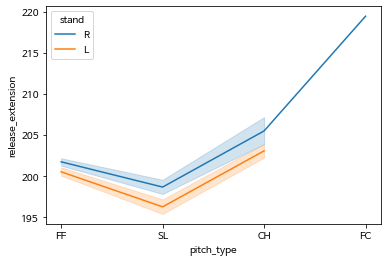

In [ ]:
sns.lineplot(x='pitch_type', y='release_extension', hue='stand', data=tay);

#### 2스트라이크 이후 투구

- 2스트라이크 이후 직구와 슬라이더의 비중이 높아지는 것을 볼 수 있습니다.

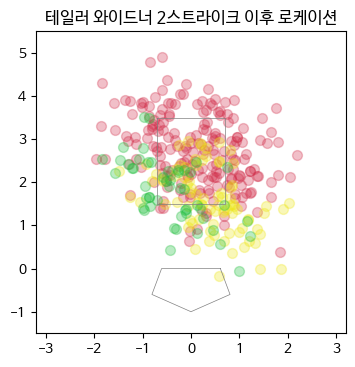

In [ ]:
tay2 = tay[tay.strikes>=2]

# 직구
tay2ff = tay2[(tay2['pitch_type']=="FF")]

# 슬라이더
tay2sl = tay2[(tay2['pitch_type']=="SL")]

# 체인지업
tay2ch = tay2[(tay2['pitch_type']=="CH")]

# 한글 폰트
plt.rc('font', family='NanumBarunGothic')

# 크기 조정
plt.figure(figsize=(4,4), dpi=100)

# 변수 지정
L, R = -0.708333, 0.708333
Bot, Top = 1.5, 3.5

L_p = L+0.1
L_m = L-0.1
R_p = R+0.1
R_m = R-0.1
Center = 0

S_height = 0
M_height = -0.6
E_height = -1.0

# 리스트 형태
x = [R_m, L_p, L_m, Center, R_p, R_m]
y = [S_height, S_height, M_height, E_height, M_height, S_height]

plt.plot(x, y, c='grey', lw=0.5)

x2 = [L, R, R, L, L]
y2 = [Top, Top, Bot, Bot, Top]
# 좌측 위, 우측 위, 우측 아래, 좌측 아래, 긋기

plt.plot(x2, y2, c='grey', lw=0.5)

# x축, y축 범위 지정
plt.xlim([L-2.5, R+2.5])
plt.ylim([Bot-3, Top+2])
plt.title('테일러 와이드너 2스트라이크 이후 로케이션')

# x축 -0.708333에서 -2.5만큼 더 갔다(L)
#      0.708333에서 2.5만큼 더 갔다(R)
# z축 최소값 -1.5, 최대값 5.5

# 투구 위치 산점도
# 빨간색 : 스윙 스트라이크(S)
# 파란색 : 콜 스트라이크(B)
alpha_ = 0.3
plt.scatter(tay2ff['plate_x'], tay2ff['plate_z'], s=50, color='#D22D49', alpha=alpha_)   
plt.scatter(tay2sl['plate_x'], tay2sl['plate_z'], s=50, color='#EEE716', alpha=alpha_)
plt.scatter(tay2ch['plate_x'], tay2ch['plate_z'], s=50, color='#1DBE3A', alpha=alpha_)
# 가장 최근(아래)에 있는 코드가 이전 코드를 겹쳐서 시각화한다.

plt.show();

#### 무브먼트

,pfx_x,pfx_z
pitch_type,,
CH,39.385188,22.044581
FC,17.678400,44.196000
FF,14.717432,38.850132
SL,-11.057626,-1.869057


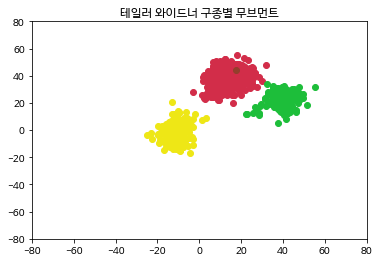

In [ ]:
from numpy.core.arrayprint import format_float_positional
FF=tay.loc[tay.pitch_type == 'FF']  #직구
CH=tay.loc[tay.pitch_type == 'SL']  #슬라이더
CH=tay.loc[tay.pitch_type == 'CH']  #체인지업
FC=tay.loc[tay.pitch_type == 'FC']  #커터

plt.scatter(FF['pfx_x'],FF['pfx_z'], c='#D22D49')
plt.scatter(SL['pfx_x'],SL['pfx_z'], c='#EEE716')
plt.scatter(CH['pfx_x'],CH['pfx_z'], c='#1DBE3A')
plt.scatter(FC['pfx_x'],FC['pfx_z'], c='#933F2C')

plt.xlim([-80, 80])
plt.ylim([-80, 80])
plt.title('테일러 와이드너 구종별 무브먼트')

tay.groupby('pitch_type')['pfx_x','pfx_z'].mean()

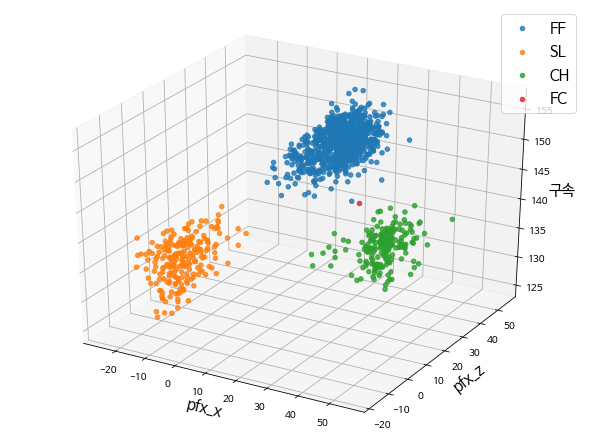

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig) 
# ax.view_init(20,80)
for i_ in ['FF', 'SL', 'CH', 'FC']:
  tt = tay[tay["pitch_type"]==i_] # 순서대로 내려가면서 투구 데이터 하나가 구종과 맞으면 하나씩 저장
  ax.scatter(tt["pfx_x"], tt['pfx_z'], tt['release_speed'], alpha=.8,label=i_,) # 맞는 데이터는 산점도 생성
ax.legend(fontsize=15)

ax.set_xlabel('pfx_x', fontsize=15)
ax.set_ylabel('pfx_z', fontsize=15)
ax.set_zlabel('구속', fontsize=15)

plt.show() 